# News Popularity Prediction

We are going to work with the online news popularity dataset, and apply different methods for
analyzing the data and compare them for getting the best results.


In [1]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
import seaborn as sns
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split 
import scipy.stats as stats
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, MaxAbsScaler, RobustScaler, QuantileTransformer
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
data = pd.read_csv('./data12/OnlineNewsPopularity.csv')

In [3]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [47]:
data.shape

(39644, 61)

We have 39644 data in general with 61 features, where 60 are independent and 1 is dependent

#### Exploratory data analysis

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39644 entries, 0 to 39643
Data columns (total 61 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   url                             39644 non-null  object 
 1    timedelta                      39644 non-null  float64
 2    n_tokens_title                 39644 non-null  float64
 3    n_tokens_content               39644 non-null  float64
 4    n_unique_tokens                39644 non-null  float64
 5    n_non_stop_words               39644 non-null  float64
 6    n_non_stop_unique_tokens       39644 non-null  float64
 7    num_hrefs                      39644 non-null  float64
 8    num_self_hrefs                 39644 non-null  float64
 9    num_imgs                       39644 non-null  float64
 10   num_videos                     39644 non-null  float64
 11   average_token_length           39644 non-null  float64
 12   num_keywords                   

In [4]:
data = data.drop(columns = ["url", " timedelta"])

All the values are non-null and consist of float64, one int 64 and an object.

In [7]:
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


Here we can get the count, mean, standard deviation, minimum and maximum and the quantiles

In [8]:
data.describe()[" shares"]

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name:  shares, dtype: float64

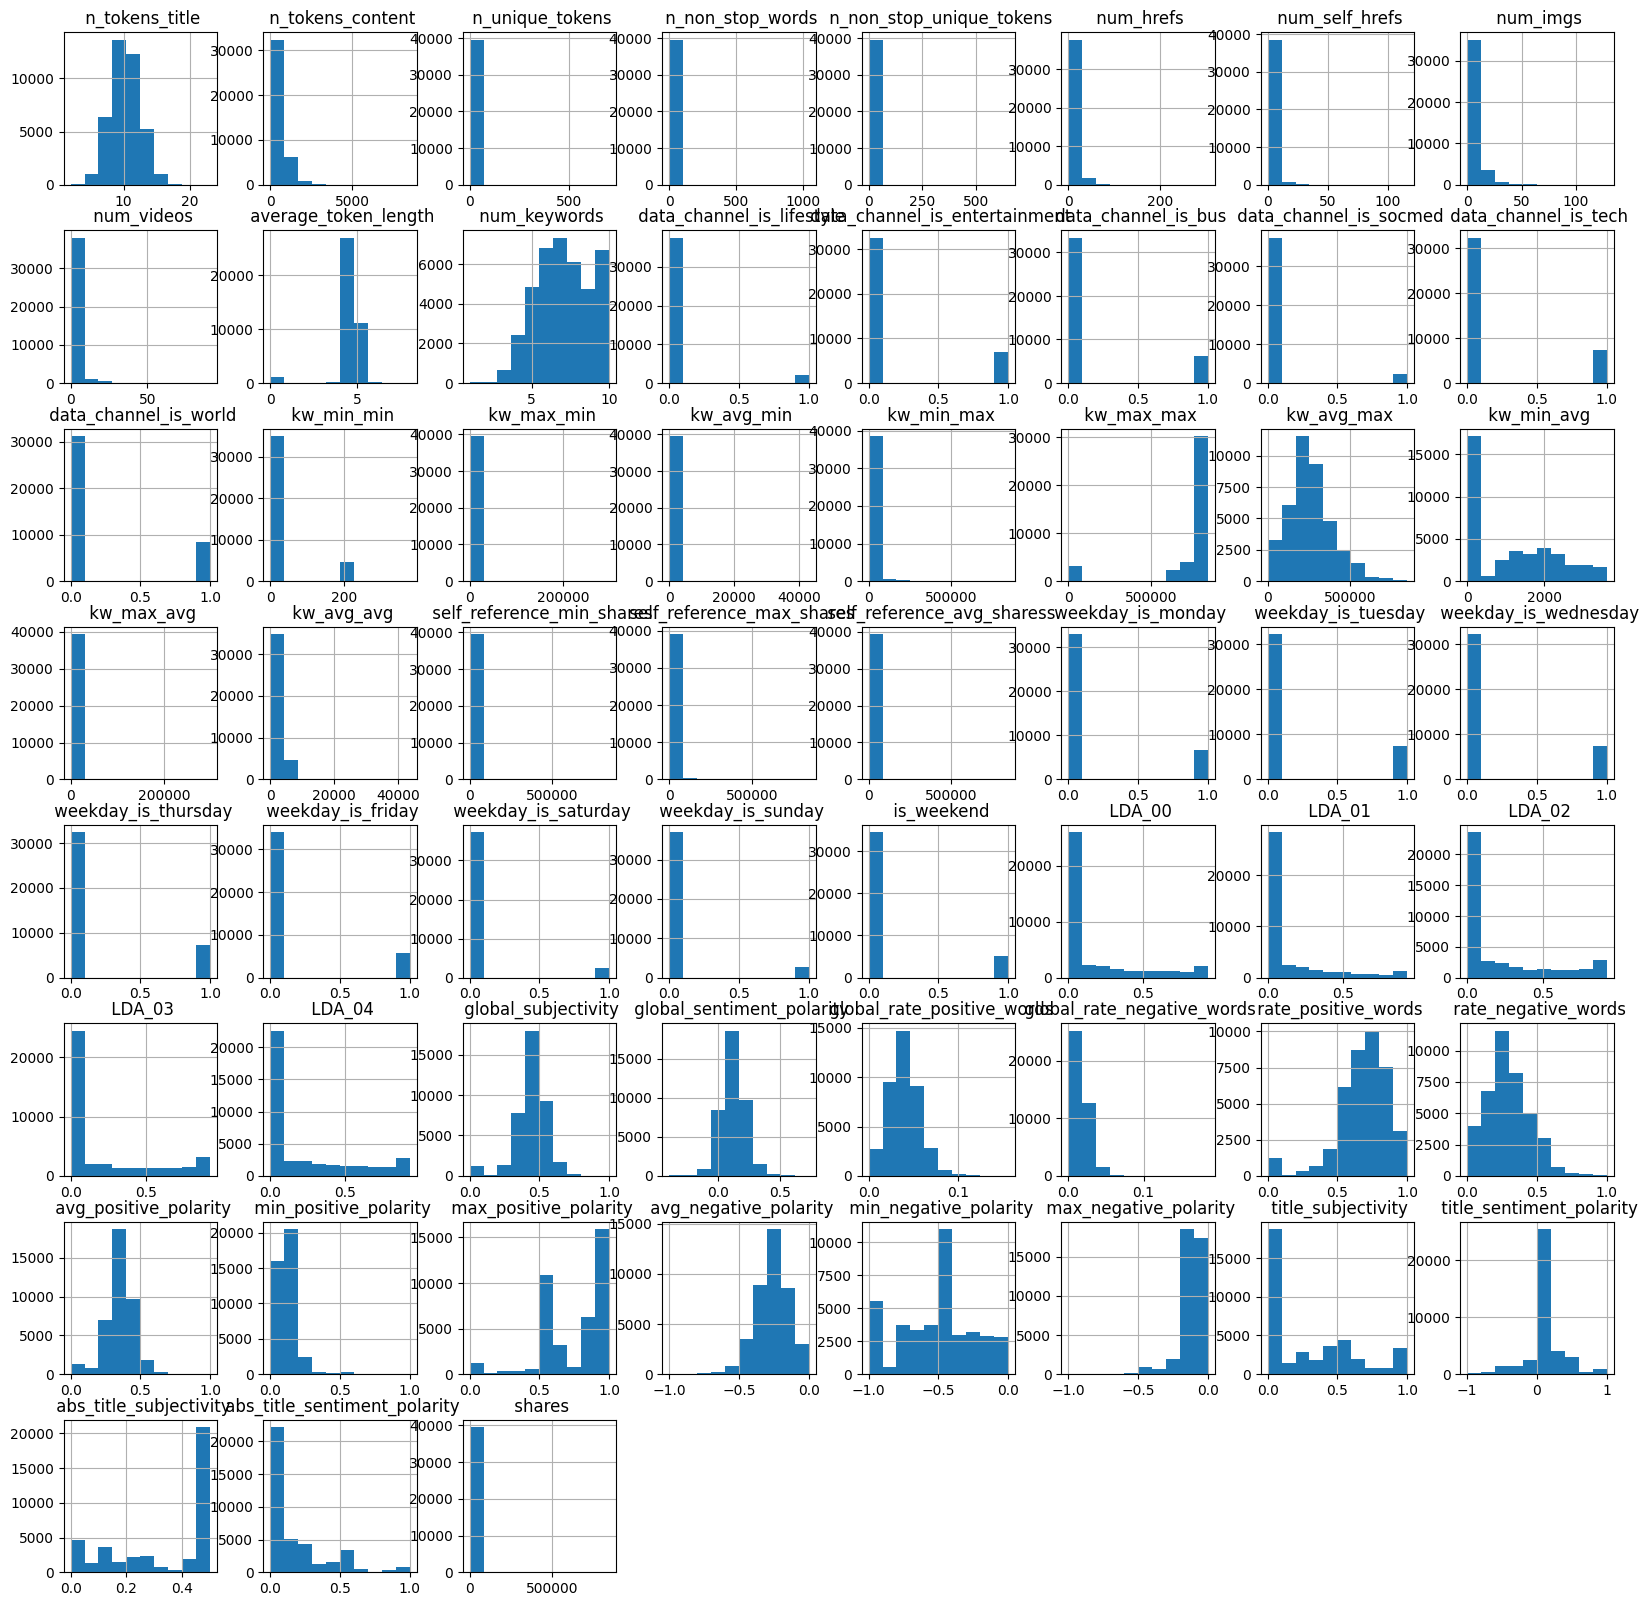

In [9]:
data.hist(figsize=(20,20))
plt.show()

In [5]:
Y = data[' shares'].values
Y

array([ 593,  711, 1500, ..., 1900, 1100, 1300], dtype=int64)

In [6]:
X = data.drop(columns=[" shares"])

In [51]:
X

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


C:\Users\ASUS\AppData\Local\Temp\ipykernel_13944\1429674076.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  sns.heatmap(data.corr().where(np.tril(np.ones(data.corr().shape)).astype(np.bool)), cmap='Blues')


<AxesSubplot: >

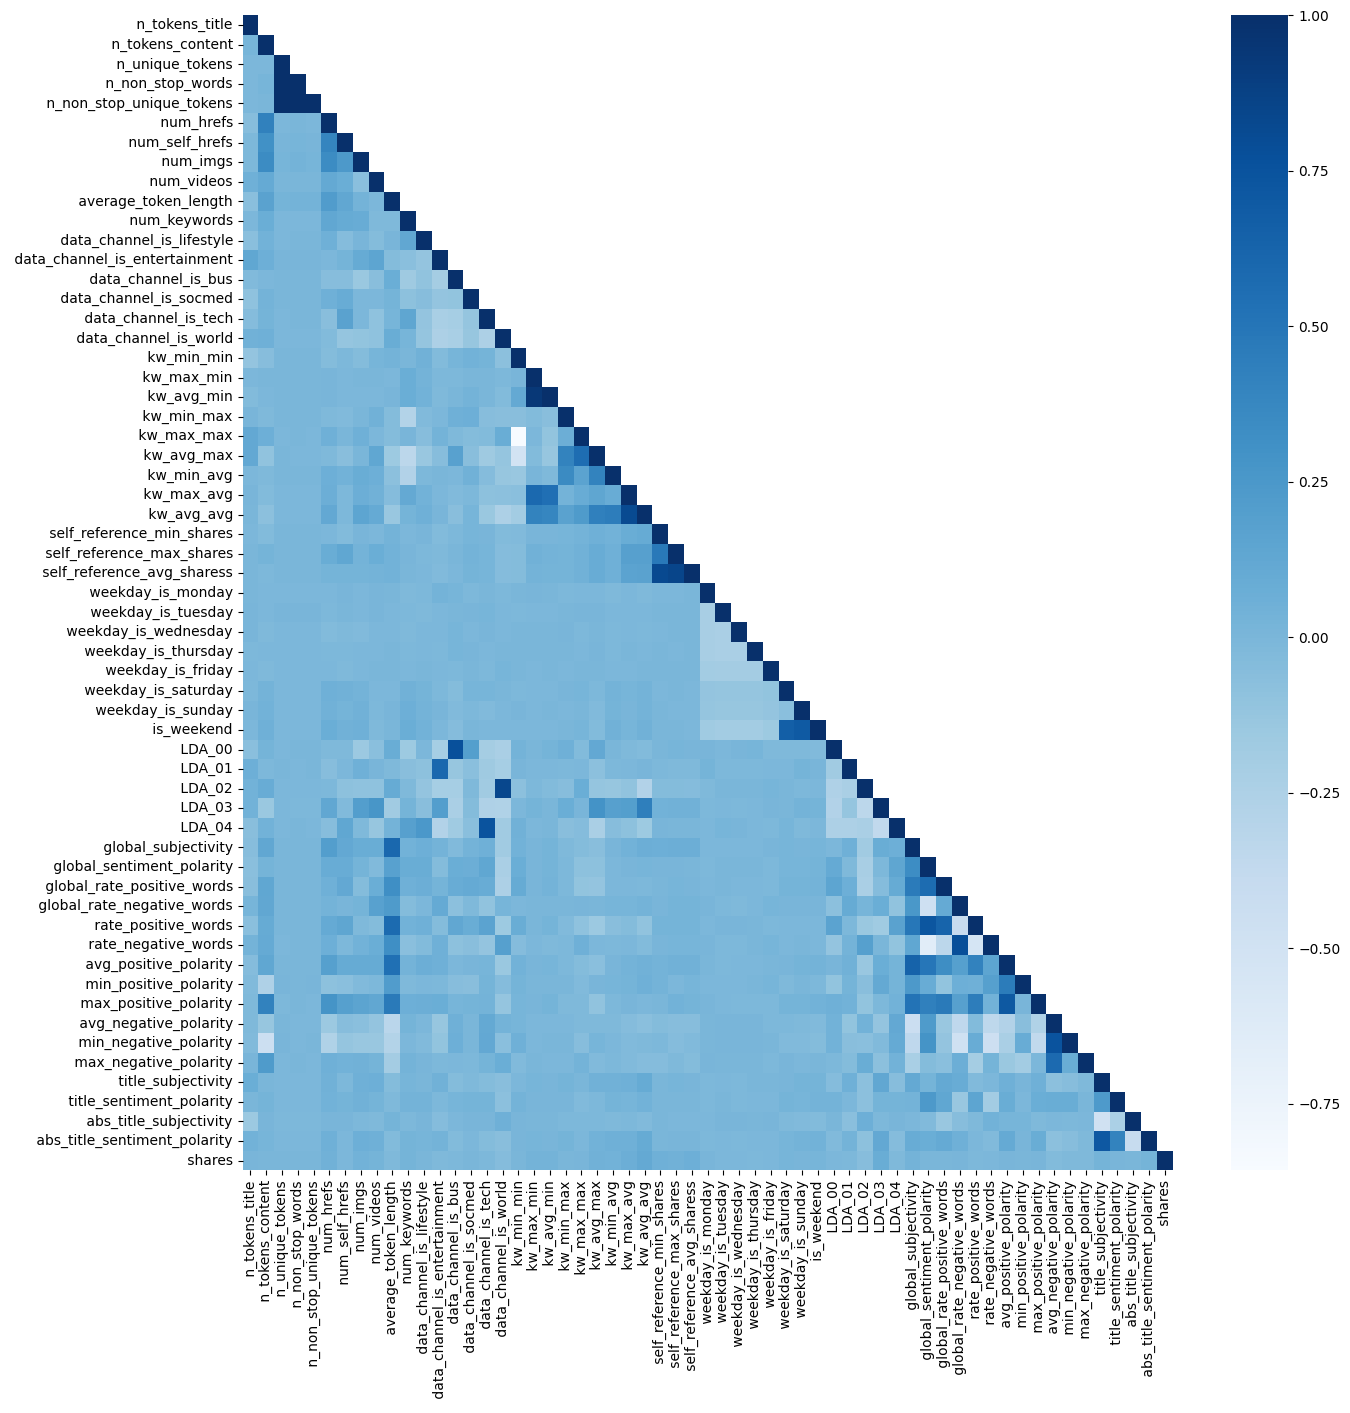

In [13]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr().where(np.tril(np.ones(data.corr().shape)).astype(np.bool)), cmap='Blues')

In [14]:
print(abs(data.corr()[" shares"]).sort_values(ascending=False))

 shares                           1.000000
 kw_avg_avg                       0.110413
 LDA_03                           0.083771
 kw_max_avg                       0.064306
 LDA_02                           0.059163
 self_reference_avg_sharess       0.057789
 self_reference_min_shares        0.055958
 data_channel_is_world            0.049497
 self_reference_max_shares        0.047115
 num_hrefs                        0.045404
 kw_avg_max                       0.044686
 kw_min_avg                       0.039551
 num_imgs                         0.039388
 avg_negative_polarity            0.032029
 global_subjectivity              0.031604
 kw_avg_min                       0.030406
 kw_max_min                       0.030114
 abs_title_sentiment_polarity     0.027135
 num_videos                       0.023936
 average_token_length             0.022007
 title_subjectivity               0.021967
 num_keywords                     0.021818
 max_negative_polarity            0.019300
 min_negati

Here i seperated some of the features that have the most correlation with our shares.

In [7]:
is_important = ((data.corr()[' shares'].abs() > .04) == True).tolist()
all_features = data.columns.tolist()
dropped_features = []

for i in range(len(is_important)-1):
    if (is_important[i] == False):
        dropped_features.append(all_features[i])
        
selected_features_set = data.drop(columns = dropped_features)
selected_features_set = selected_features_set.drop(columns = " shares")
selected_features_set

,num_hrefs,data_channel_is_world,kw_avg_max,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_02,LDA_03
0,4.0,0.0,0.000000,0.000000,0.000000,496.0,496.0,496.000000,0.040005,0.041263
1,3.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.050096,0.050101
2,3.0,0.0,0.000000,0.000000,0.000000,918.0,918.0,918.000000,0.033351,0.033334
3,9.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.494651,0.028905
4,19.0,0.0,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,0.028575,0.028572
...,...,...,...,...,...,...,...,...,...,...
39639,9.0,0.0,374962.500000,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.151701,0.025000
39640,9.0,0.0,192985.714286,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.231866,0.681635
39641,24.0,0.0,295850.000000,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.025207,0.643794
39642,10.0,1.0,254600.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.839987,0.040002


Here i'm gonna check on some of the correlations, to see the seperate impact of our features on the shares

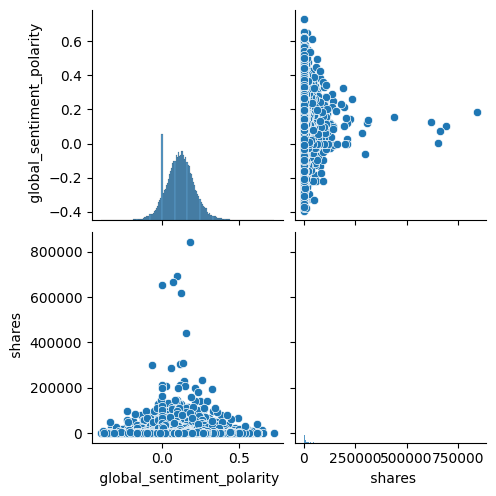

In [16]:
sns.pairplot(data[[' global_sentiment_polarity',' shares']]) 

This feature has the highest correlation (according to our best features from previous exercises), and has a normal distribution

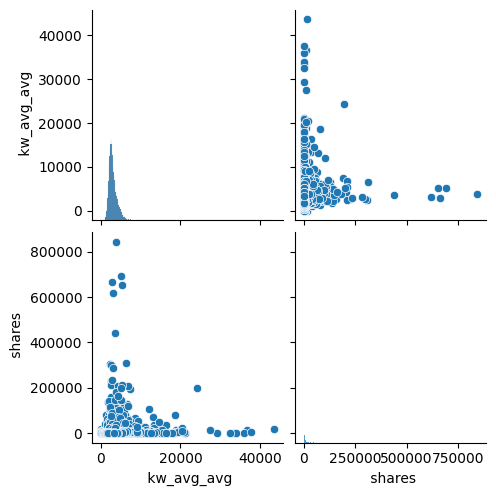

In [381]:
sns.pairplot(data[[' kw_avg_avg',' shares']]) 

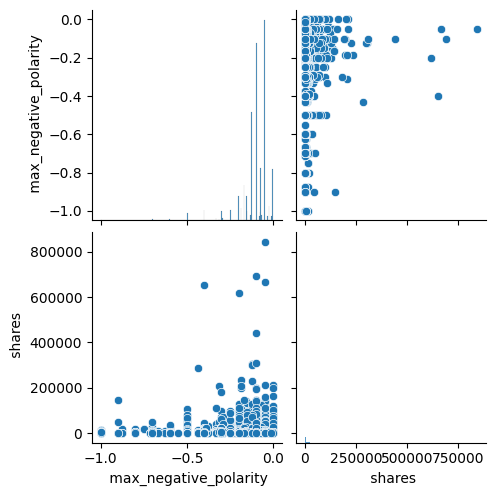

In [157]:
sns.pairplot(data[[' max_negative_polarity',' shares']])

We see that most high shares are when when channel_is_world is 0 or False

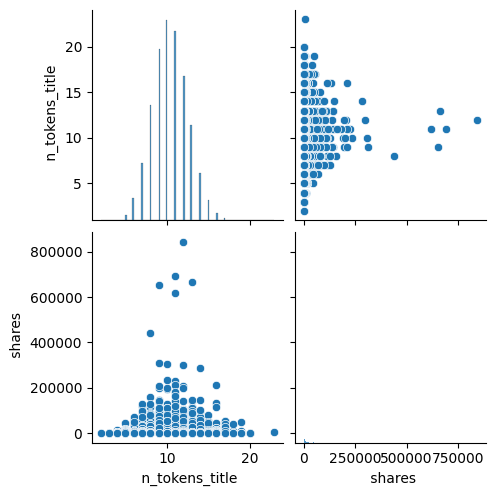

In [449]:
sns.pairplot(data[[' n_tokens_title',' shares']])

This looks like a normal distribution, where aboout 10 tokens have the most shares

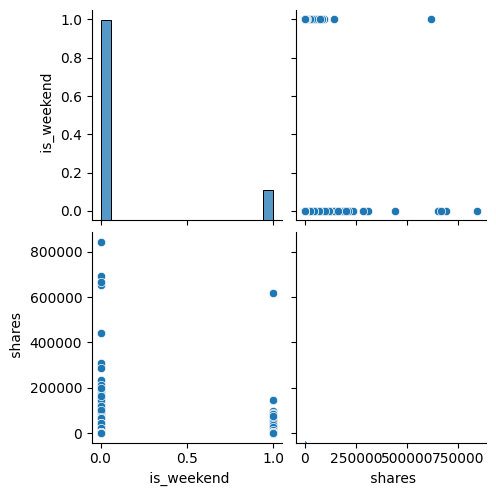

In [450]:
sns.pairplot(data[[' is_weekend',' shares']])

We see that the shares are better when it is not the weekend

### Hypothesis testing

##### Hypothesis 1

Mean shares are higher in weekends

In [994]:
is_weekend = data[data[" is_weekend"] == 1]
is_not_weekend = data[data[" is_weekend"] == 0]

In [996]:
pval = stats.ttest_ind(is_weekend[" shares"].values,is_not_weekend[" shares"].values).pvalue
pval

0.0007337519086551708

We find that the p-value is very small, which means that the both samples have the same distribution, and the same mean.<br>
Thus, it doesn't impact the shares.

##### Hypothesis 2


Shares in the 2 random samples, sample 1 and sample 2, have the same mean as our dataset

In [263]:
a = 0.05 #significance level

In [248]:
stats.ttest_1samp(data[" shares"].values,30)

Ttest_1sampResult(statistic=57.631116595632236, pvalue=0.0)

In [235]:
stats.ttest_ind(data[" shares"].values,30)

array([ 593,  711, 1500, ..., 1900, 1100, 1300], dtype=int64)

In [242]:
data[" shares"].values.mean()

3395.3801836343455

In [249]:
sample1 = data.sample(frac = 0.2)

In [250]:
sample2 = data.sample(frac = 0.2)

In [265]:
stats.ttest_ind(sample1[" shares"].values,sample2[" shares"].values)

Ttest_indResult(statistic=1.5913709648985153, pvalue=0.1115460496001775)

In [267]:
pval_1 = stats.ttest_ind(sample1[" shares"].values,data[" shares"].values).pvalue

In [266]:
pval_2 = stats.ttest_ind(sample2[" shares"].values,data[" shares"].values).pvalue

In [258]:
print("Sample 1 mean of shares:", sample1[" shares"].values.mean())

Sample 1 mean of shares: 3409.4121579013745


In [259]:
print("Sample 2 mean of shares:", sample2[" shares"].values.mean())

Sample 2 mean of shares: 3158.412788497919


In [260]:
print("Data mean of shares:", data[" shares"].values.mean())

Data mean of shares: 3395.3801836343455


In [273]:
if pval_1 < a:
 print("pval of first sample is ", pval_1.round(2), "Null Hypothesis Rejected")
 print("samples are statistically different")
else:
 print("pval is ", pval_1.round(2), "Null Hypothesis Accepted")
 print("samples are NOT statistically different \n")

if pval_2 < a:
 print("pval of first sample is ", pval_2.round(2), "Null Hypothesis Rejected")
 print("samples are statistically different")
else:
 print("pval is ", pval_2.round(2), "Null Hypothesis Accepted")
 print("samples are NOT statistically different")

pval is  0.92 Null Hypothesis Accepted
samples are NOT statistically different 

pval is  0.08 Null Hypothesis Accepted
samples are NOT statistically different


We first compare our 2 samples to each other, and see that the p-value is about 0.11 <br>
Then we compare them to our main dataset and calculate the p-value. <br>
We see that while our first sample has a p-value of 0.92 which is pretty good, the other sample only got 0.07. <br>
It is still above our significance level which was 0.05, so the null hypothesis is true.

##### Hypothesis 3

Data channels that are world have more shares than lifestyle channels.

In [1004]:
is_world = data[data[" data_channel_is_world"] == 1]
is_lifestyle = data[data[" data_channel_is_lifestyle"] == 1]

In [1005]:
pval = stats.ttest_ind(is_world[" shares"].values,is_lifestyle[" shares"].values).pvalue
pval

2.5394657044035076e-17

The pvalue is big, so our hypothesis is true and accepted. The world channels have a bigger impact. 

Hypothesis 4: shares are more in monday than in wednesday <br>
Hypothesis 5: News with less than 600 words (n_tokens) have better shares

## Predicting Data

In [75]:
def plot_hist_box(data, feature):
    plt.figure(figsize=(8,3))
    plt.title(feature)
    data[feature].hist()
    plt.show()
    plt.figure(figsize=(8,3))
    sns.boxplot(data[feature])
    plt.show()
#     plt.figure(figsize=(8,3))
#     sns.histplot(data, x = feature)
#     plt.show()
    
def plot_hist(data,feature):
    plt.figure(figsize=(8,3))
    sns.histplot(data, x = feature)
    plt.show()
    
def plot_pair(data, f1, f2):
    sns.pairplot(data[[f1,f2]])

### Linear Regression

In [22]:
def linear_regression(X_train, y_train, X_test, y_test):
    lr_model = LinearRegression()

    lr_model.fit(X_train, y_train)

    train_score_linear = lr_model.score(X_train, y_train)
    test_score_linear = lr_model.score(X_test, y_test)
    print(f"Train score for linear regression = {train_score_linear.round(6)*100}%")
    print(f"Test score for linear regression = {test_score_linear.round(6)*100}%")
    
    y_pred = lr_model.predict(X_test)
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    print("MSE: ",mse)
    print("MAE: ",mae)

### Polynomial Regression

In [23]:
def polynomial_regression(X_train, y_train, X_test, y_test):
    poly = PolynomialFeatures(degree=2, include_bias=False)

    poly_features_train = poly.fit_transform(X_train)
    poly_features_test = poly.fit_transform(X_test)

    poly_model = LinearRegression()
    poly_model.fit(poly_features_train, y_train)
    y_pred = poly_model.predict(poly_features_test)
   
    train_score_poly = poly_model.score(poly_features_train, y_train)
    test_score_poly = poly_model.score(poly_features_test, y_test)
    print(f"Train score for polynomial regression = {train_score_poly.round(6)*100}%")
    print(f"Test score for polynomial regression = {test_score_poly.round(6)*100}%")
    
    mse = mean_squared_error(y_test,y_pred)
    mae = mean_absolute_error(y_test,y_pred)
    print("MSE: ",mse)
    print("MAE: ",mae)
    
   

### Ridge and Lasso Regression

In [24]:
#Ridge Regression Model

def ridge_regression(X_train, y_train, X_test, y_test):
    ridge_model = Ridge(alpha=10)

    ridge_model.fit(X_train,y_train)

    train_score_ridge = ridge_model.score(X_train, y_train)
    test_score_ridge = ridge_model.score(X_test, y_test)

    print(f"Train score for ridge regression = {train_score_ridge.round(6)*100}%")
    print(f"Test score for ridge regression = {test_score_ridge.round(6)*100}%")

In [25]:
#Lasso Regreassion 

def lasso_regression(X_train, y_train, X_test, y_test):
    lasso_model = Lasso(alpha=10)

    lasso_model.fit(X_train,y_train)

    train_score_lasso = lasso_model.score(X_train, y_train)
    test_score_lasso = lasso_model.score(X_test, y_test)

    print(f"Train score for lasso regression = {train_score_lasso.round(6)*100}%")
    print(f"Test score for lasso regression = {test_score_lasso.round(6)*100}%")

In [26]:
def test_data(X_train, y_train, X_test, y_test):
    linear_regression(X_train, y_train, X_test, y_test)
    print("\n")
    polynomial_regression(X_train, y_train, X_test, y_test)
    print("\n")

### Testing our plain data

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

test_data(X_train, y_train, X_test, y_test)
lasso_regression(X_train, y_train, X_test, y_test)
ridge_regression(X_train, y_train, X_test, y_test)

Train score for linear regression = 2.1916%
Test score for linear regression = 2.618%
MSE:  117512637.27788101
MAE:  2999.1860757792233


Train score for polynomial regression = 9.4511%
Test score for polynomial regression = -8697.9462%
MSE:  10616643066.02446
MAE:  5417.877358066371


Train score for lasso regression = 2.1061%
Test score for lasso regression = 2.6414%
Train score for ridge regression = 2.1832000000000003%
Test score for ridge regression = 2.6107%


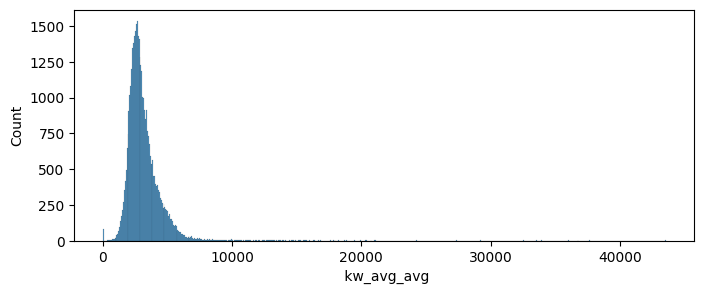

In [858]:
plot_hist(data, " kw_avg_avg")

## Implementing Scaling Methods

### Min-max Scaler

In [28]:
def min_max_scaler(data):
    scaler_min_max = MinMaxScaler()
    scaled_min_max_data = pd.DataFrame(scaler_min_max.fit_transform(data), columns = data.columns)
    
    X = scaled_min_max_data.drop(columns=" shares")
    y = scaled_min_max_data[" shares"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    test_data(X_train, y_train, X_test, y_test)
    
    return scaled_min_max_data

#### Plain Data

In [29]:
min_max_data = min_max_scaler(data)

Train score for linear regression = 2.1916%
Test score for linear regression = 2.618%
MSE:  0.00016524229649600964
MAE:  0.00355648454076017


Train score for polynomial regression = 9.9156%
Test score for polynomial regression = -4.4273495990422274e+20%
MSE:  751253591723964.9
MAE:  328084.79747501743




In [869]:
min_max_data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.399940,0.064493,0.000782,0.000956,0.001060,0.035802,0.028393,0.035501,0.013735,0.565594,...,0.095446,0.756728,0.740476,0.478056,0.892500,0.282353,0.535713,0.683686,0.156064,0.004025
std,0.100668,0.055594,0.005022,0.005020,0.005023,0.037276,0.033234,0.064917,0.045141,0.105006,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.132725,0.377582,0.226294,0.013787
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.333333,0.029030,0.000672,0.000960,0.000963,0.013158,0.008621,0.007812,0.000000,0.556909,...,0.050000,0.600000,0.671617,0.300000,0.875000,0.000000,0.500000,0.333333,0.000000,0.001121
50%,0.380952,0.048265,0.000769,0.000960,0.001062,0.026316,0.025862,0.007812,0.000000,0.579999,...,0.100000,0.800000,0.746667,0.500000,0.900000,0.150000,0.500000,1.000000,0.000000,0.001659
75%,0.476190,0.084494,0.000868,0.000960,0.001161,0.046053,0.034483,0.031250,0.010989,0.603721,...,0.100000,1.000000,0.813095,0.700000,0.950000,0.500000,0.575000,1.000000,0.250000,0.003319
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


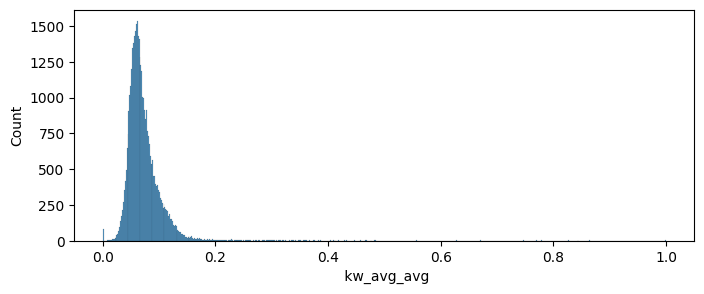

In [859]:
plot_hist(min_max_data, " kw_avg_avg")

### Standard Scaler 

In [30]:
def standard_scaler(data):
    scaler = StandardScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
    
    X = scaled_data.drop(columns=" shares")
    y = scaled_data[" shares"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    test_data(X_train, y_train, X_test, y_test)
    
    return scaled_data

#### Plain Data

In [31]:
standard_data = standard_scaler(data)

Train score for linear regression = 2.1895000000000002%
Test score for linear regression = 2.6269%
MSE:  0.8692091080073348
MAE:  0.2577134803788798


Train score for polynomial regression = 9.899%
Test score for polynomial regression = -6.3545098068306805e+19%
MSE:  5.6724053626847974e+17
MAE:  11549044.448709344




In [32]:
standard_data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000,3.964400e+04,3.964400e+04,3.964400e+04,...,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04,3.964400e+04
mean,3.785355e-16,6.703233e-17,-1.218770e-17,-3.584617e-19,2.079078e-17,8.603080e-17,0.000000,-3.441232e-17,-5.735387e-18,1.491201e-16,...,-1.147077e-17,-1.835324e-16,5.018463e-17,-3.226155e-18,1.089723e-16,-6.524003e-17,6.308926e-17,-6.595695e-17,4.552463e-17,1.577231e-17
std,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013,1.000013e+00,1.000013e+00,1.000013e+00,...,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00,1.000013e+00
min,-3.972899e+00,-1.160078e+00,-1.557137e-01,-1.904869e-01,-2.110943e-01,-9.604492e-01,-0.854360,-5.468724e-01,-3.042682e-01,-5.386389e+00,...,-1.338384e+00,-3.053998e+00,-5.797463e+00,-1.646847e+00,-9.358111e+00,-8.708066e-01,-4.036308e+00,-1.810719e+00,-6.896581e-01,-2.919444e-01
25%,-6.616566e-01,-6.378980e-01,-2.196895e-02,6.750748e-04,-1.943043e-02,-6.074626e-01,-0.594963,-4.265258e-01,-3.042682e-01,-8.270459e-02,...,-6.372594e-01,-6.325204e-01,-5.391186e-01,-6.133826e-01,-1.834899e-01,-8.708066e-01,-2.690762e-01,-9.278964e-01,-6.896581e-01,-2.106667e-01
50%,-1.886220e-01,-2.919004e-01,-2.553544e-03,6.750753e-04,3.984330e-04,-2.544760e-01,-0.076169,-4.265258e-01,-3.042682e-01,1.371904e-01,...,6.386488e-02,1.746388e-01,4.847016e-02,7.559352e-02,7.864213e-02,-4.081910e-01,-2.690762e-01,8.377486e-01,-6.896581e-01,-1.716190e-01
75%,7.574472e-01,3.597638e-01,1.717856e-02,6.750757e-04,2.004862e-02,2.750039e-01,0.183228,-6.548578e-02,-6.082908e-02,3.630995e-01,...,6.386488e-02,9.817980e-01,5.685644e-01,7.645696e-01,6.029062e-01,6.712454e-01,2.960086e-01,8.377486e-01,4.151124e-01,-5.120755e-02
max,5.960828e+00,1.682755e+01,1.989545e+02,1.990003e+02,1.988838e+02,2.586653e+01,29.235709,1.485750e+01,2.184869e+01,4.137038e+00,...,1.268410e+01,9.817980e-01,2.031912e+00,1.798034e+00,1.127170e+00,2.213297e+00,3.498156e+00,8.377486e-01,3.729424e+00,7.223865e+01


### Robust Scaler

In [33]:
def robust_scaler(data):
    scaler = RobustScaler()
    scaled_data = pd.DataFrame(scaler.fit_transform(data), columns = data.columns)
    
    X = scaled_data.drop(columns=" shares")
    y = scaled_data[" shares"]
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
    
    test_data(X_train, y_train, X_test, y_test)
    
    return scaled_data

#### Plain Data

In [34]:
robust_data = robust_scaler(data)

Train score for linear regression = 2.1916%
Test score for linear regression = 2.6185%
MSE:  34.18714802358799
MAE:  1.6176687229219349


Train score for polynomial regression = 0.0716%
Test score for polynomial regression = -0.7992000000000001%
MSE:  35.38699740031521
MAE:  1.7356041578838428




In [873]:
robust_data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,3.964400e+04,3.964400e+04,3.964400e+04,39644.000000,39644.000000,39644.000000,39644.000000,3.964400e+04,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,0.132916,0.292585,6.522876e-02,-8.185977e+05,-1.009226e-02,0.288369,0.097879,1.181381,1.249874,-3.077369e-01,...,-0.091089,-0.108181,-0.043758,-0.054859,-0.100003,0.264706,0.476170,-0.474472,0.624255,1.076257
std,0.704679,1.002356,2.554473e+01,1.212617e+09,2.533021e+01,1.133202,1.285047,2.769811,4.107855,2.243166e+00,...,1.426299,0.619464,0.902797,0.725724,1.271640,0.648495,1.769668,0.566372,0.905177,6.271279
min,-2.666667,-0.870213,-3.912386e+00,-2.318034e+08,-5.357087e+00,-0.800000,-1.000000,-0.333333,0.000000,-1.239015e+01,...,-2.000000,-2.000000,-5.277623,-1.250000,-12.000000,-0.300000,-6.666667,-1.500000,0.000000,-0.754585
25%,-0.333333,-0.346809,-4.959551e-01,-6.108020e-01,-5.022630e-01,-0.400000,-0.666667,0.000000,0.000000,-4.932547e-01,...,-1.000000,-0.500000,-0.530467,-0.500000,-0.333333,-0.300000,0.000000,-1.000000,0.000000,-0.244876
50%,0.000000,0.000000,-4.027676e-16,0.000000e+00,-4.306855e-16,0.000000,0.000000,0.000000,0.000000,1.179724e-15,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.666667,0.653191,5.040449e-01,3.891980e-01,4.977370e-01,0.600000,0.333333,1.000000,1.000000,5.067453e-01,...,0.000000,0.500000,0.469533,0.500000,0.666667,0.700000,1.000000,0.000000,1.000000,0.755124
max,4.333333,17.159574,5.082239e+03,2.413074e+11,5.037694e+03,29.600000,37.666667,42.333333,91.000000,8.972210e+00,...,18.000000,0.500000,1.790622,1.250000,1.333333,1.700000,6.666667,0.000000,4.000000,454.099245


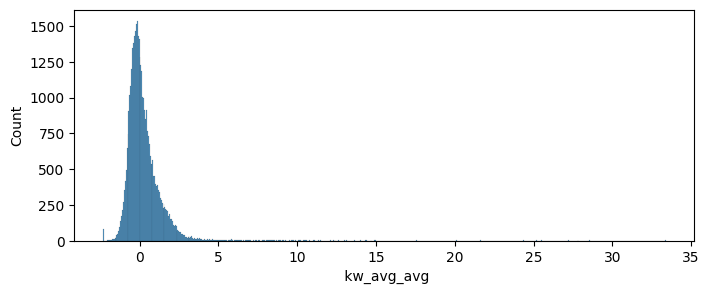

In [853]:
plot_hist(robust_data, " kw_avg_avg")

### Using feature selection method from scratch

In [1]:
def forward_feature_selection(X_train,X_test, y, y_test):
    
    all_features = X_train.columns.tolist()
    selected_features = []
    
    for _ in all_features:
        remaining_features = list(set(all_features)-set(selected_features))
        min_err = math.inf

        for new_feature in remaining_features:
            
            X = X_train[selected_features + [new_feature]].values
            X_t = X_test[selected_features + [new_feature]].values
            
            if X.shape[1] == 1:
                X = X.reshape(-1,1)
            
            model = LinearRegression()
            model.fit(X, y)
            
            y_pred = model.predict(X_t)
            error = mean_squared_error(y_test, y_pred)
            
            if error < min_err:
                min_err = error
                next_best_feature = new_feature
                
        selected_features.append(next_best_feature)
    
    return selected_features

In [159]:
best_features = forward_feature_selection(X_train, X_test, y_train, y_test)

In [160]:
best_features_10 = best_features[:10]
best_features_10

[' kw_avg_avg',
 ' self_reference_min_shares',
 ' kw_max_avg',
 ' kw_min_avg',
 ' avg_negative_polarity',
 ' kw_min_min',
 ' data_channel_is_entertainment',
 ' num_imgs',
 ' average_token_length',
 ' weekday_is_monday']

In [161]:
# On plain dataset
X_train, X_test, y_train, y_test = train_test_split(X[best_features_10], Y, test_size=0.20, random_state=42)
test_data(X_train, y_train, X_test, y_test)

Train score for linear regression = 1.7662%
Test score for linear regression = 2.9192%
MSE:  117149124.3436251
MAE:  3008.5621343348344


Train score for polynomial regression = 2.4217%
Test score for polynomial regression = 0.642%
MSE:  119897073.76383033
MAE:  3042.248252537504




# Altering data to find the best solution 

In [35]:
scaled_data = robust_scaler(data)

Train score for linear regression = 2.1916%
Test score for linear regression = 2.6185%
MSE:  34.18714802358799
MAE:  1.6176687229219349


Train score for polynomial regression = 0.0716%
Test score for polynomial regression = -0.7992000000000001%
MSE:  35.38699740031521
MAE:  1.7356041578838428




In [105]:
altered_data = data.copy()

In [106]:
altered_data[' shares'] = [np.log(x) for x in altered_data[' shares']]

In [107]:
altered_data = altered_data[altered_data[" n_tokens_content"] != 0]

In [108]:
scaled_data = robust_scaler(altered_data)

Train score for linear regression = 13.093499999999999%
Test score for linear regression = 12.065%
MSE:  0.6828105118955266
MAE:  0.6137286329766395


Train score for polynomial regression = 1.2736%
Test score for polynomial regression = 1.4995%
MSE:  0.764851467786504
MAE:  0.6630435377915319




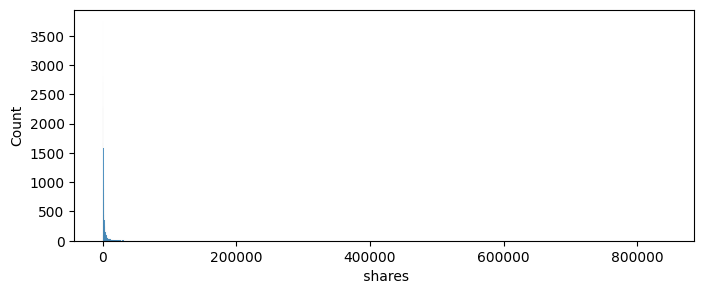

In [44]:
plot_hist(data, " shares")

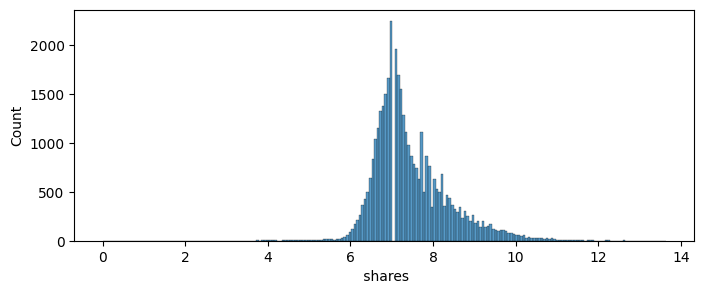

In [43]:
plot_hist(altered_data, " shares")

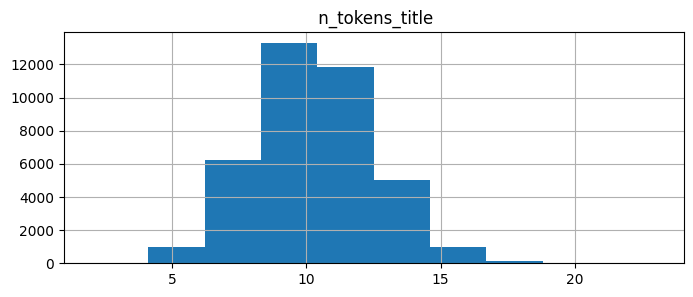

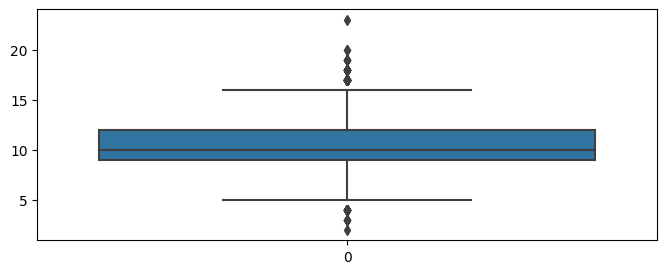

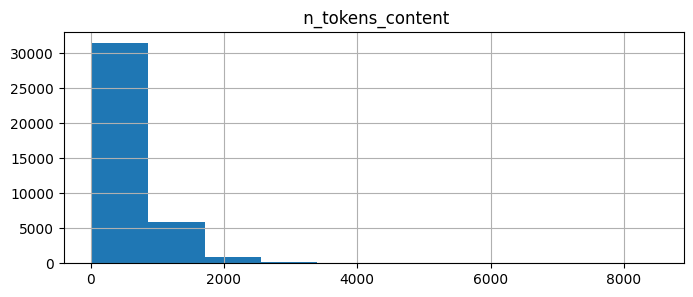

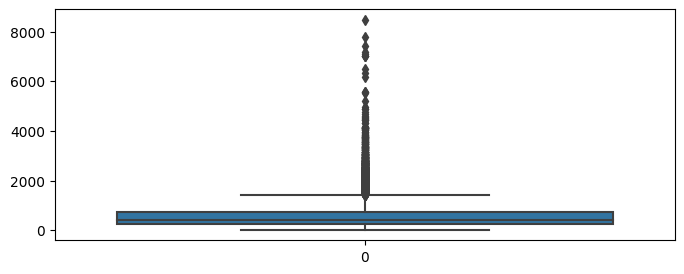

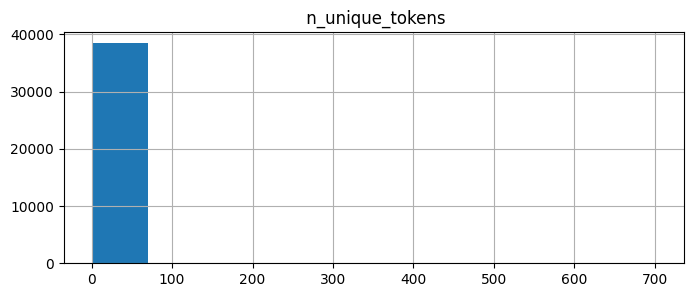

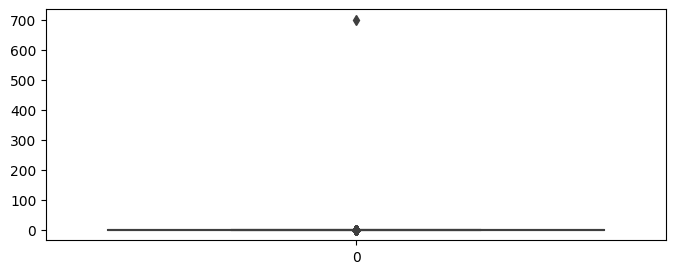

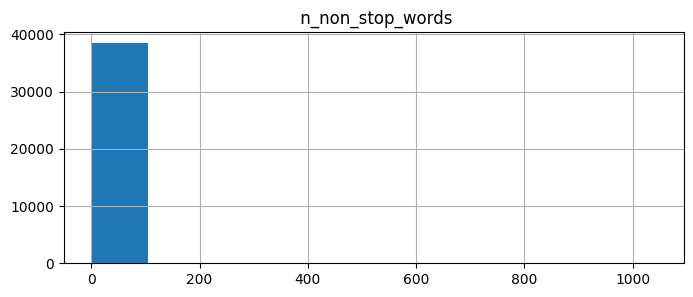

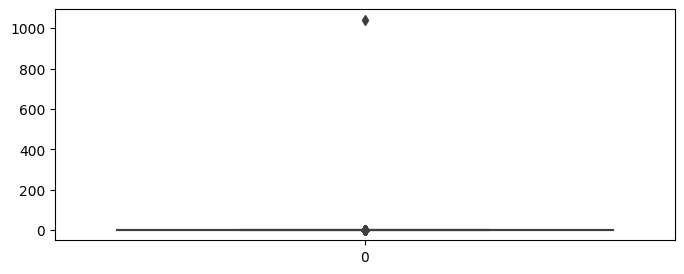

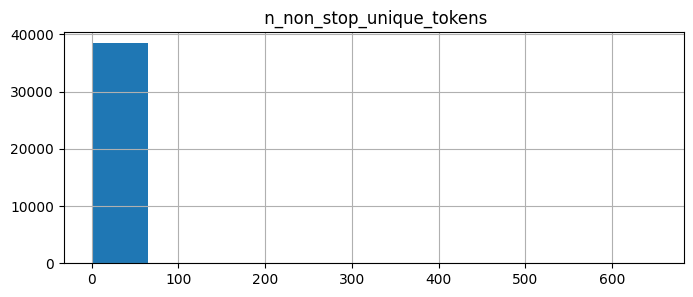

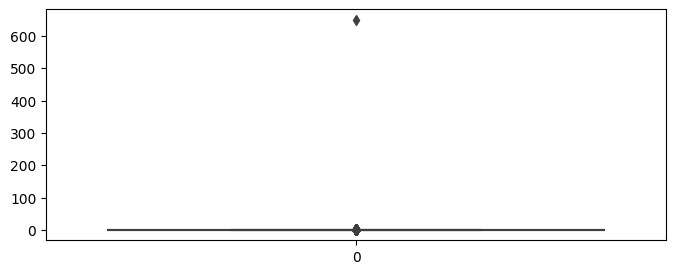

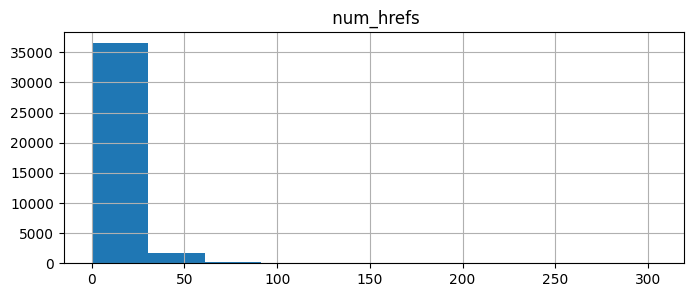

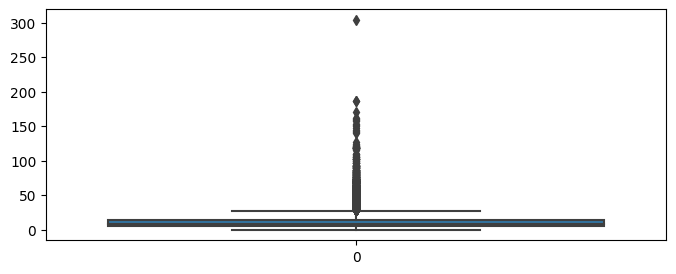

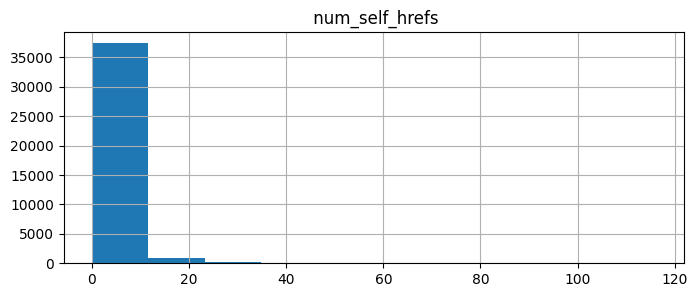

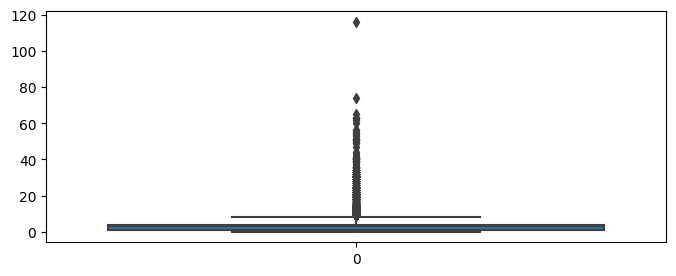

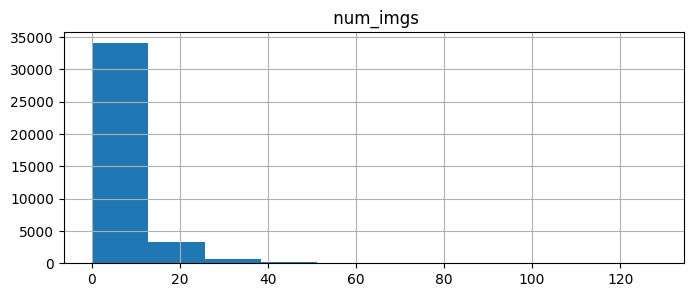

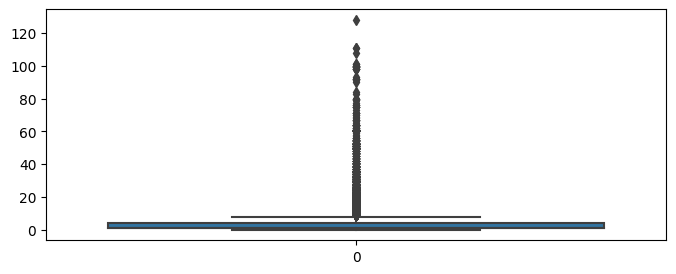

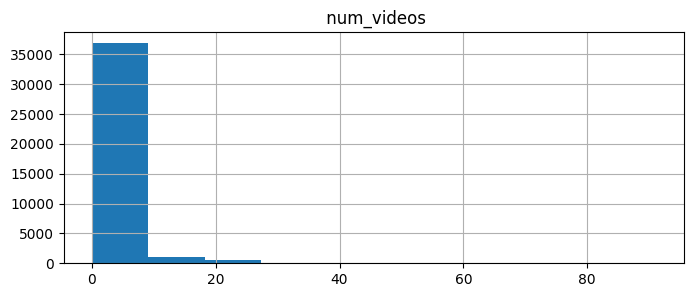

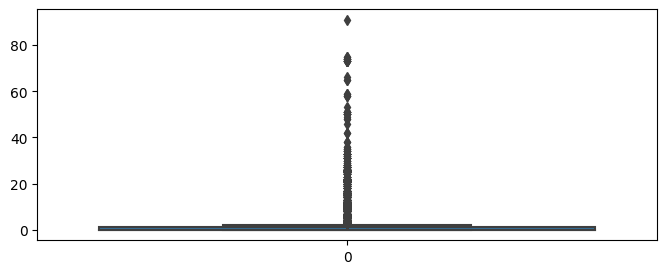

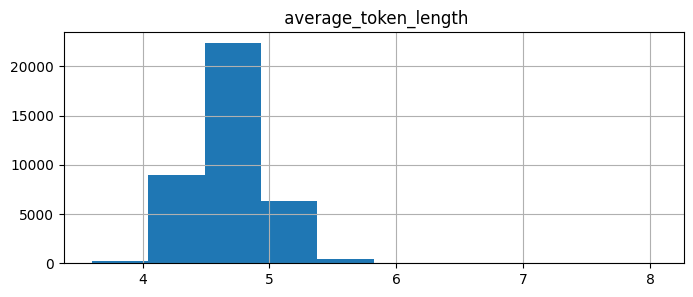

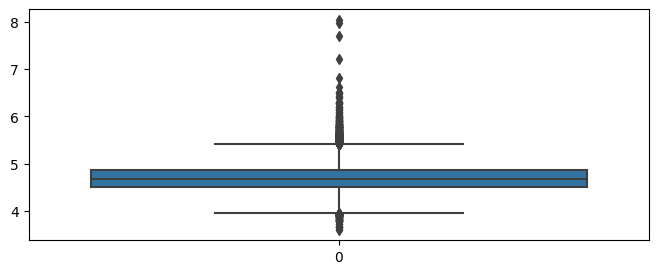

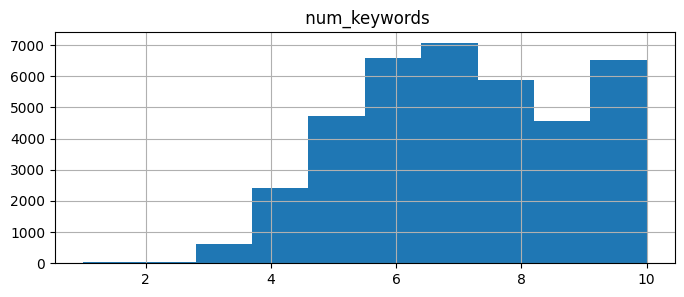

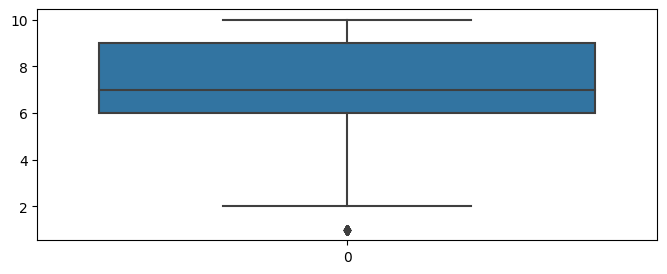

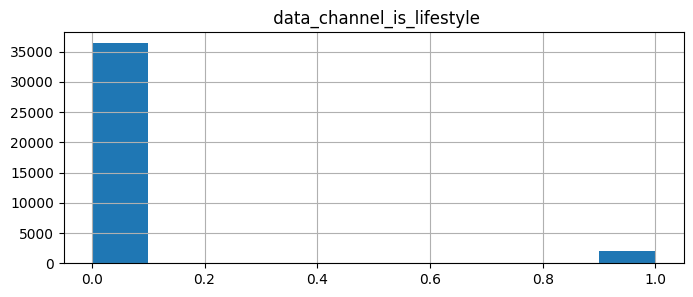

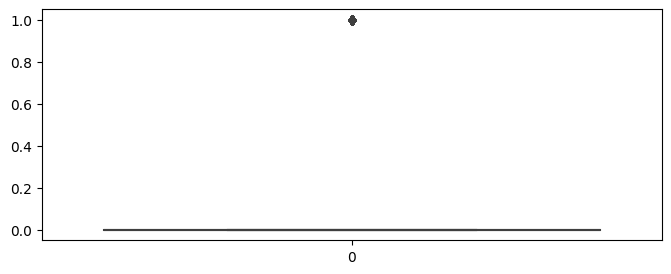

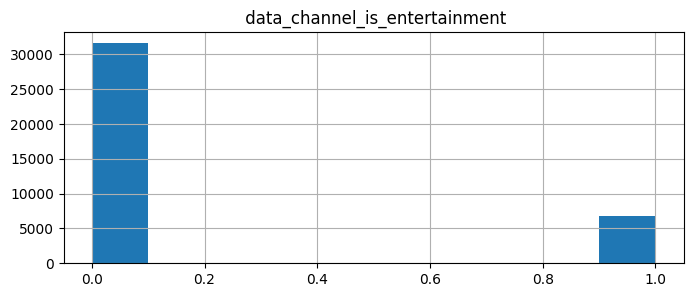

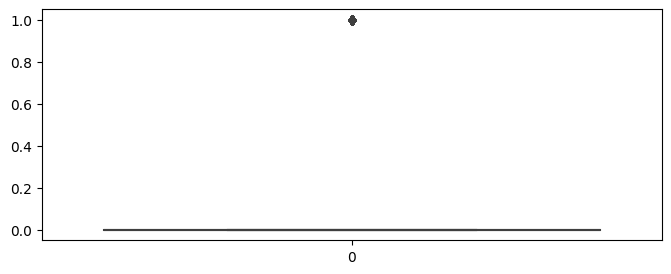

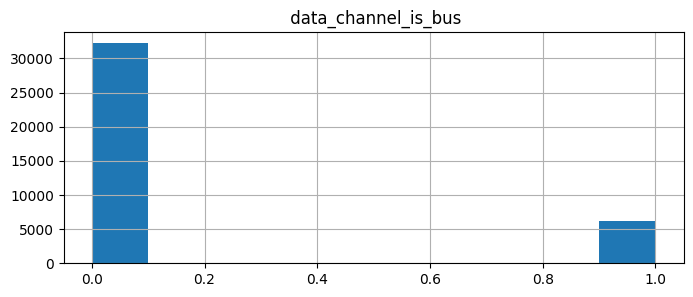

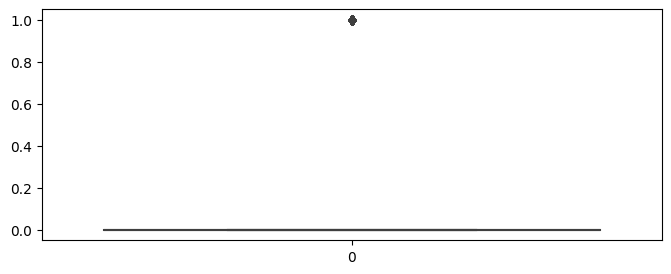

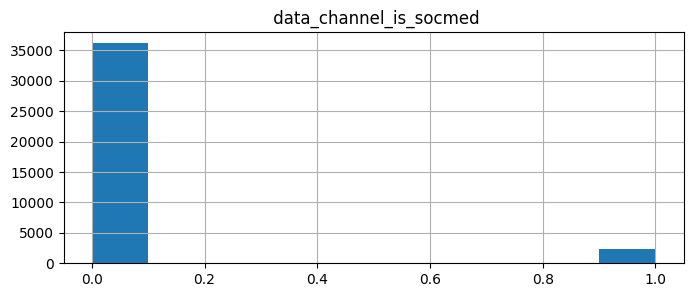

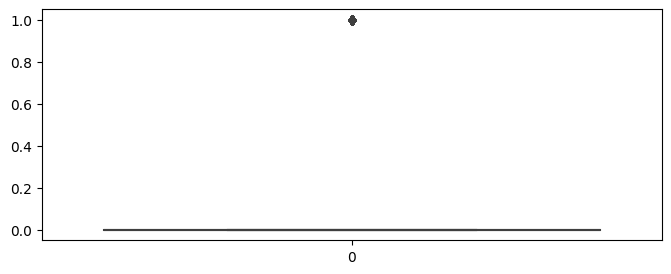

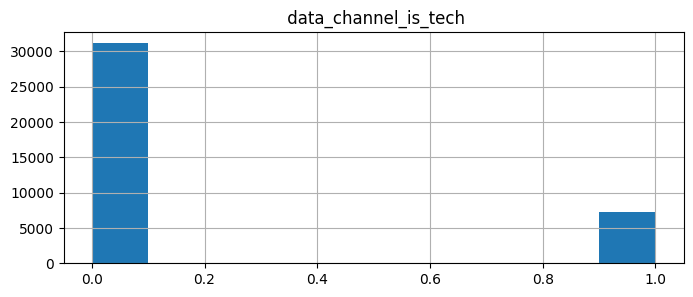

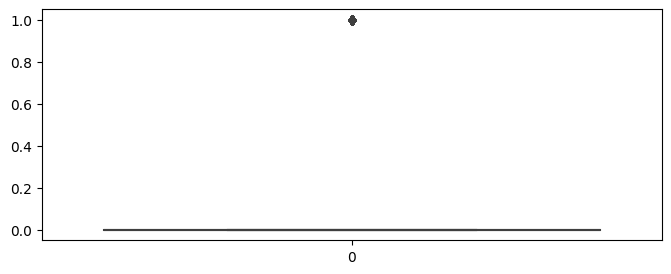

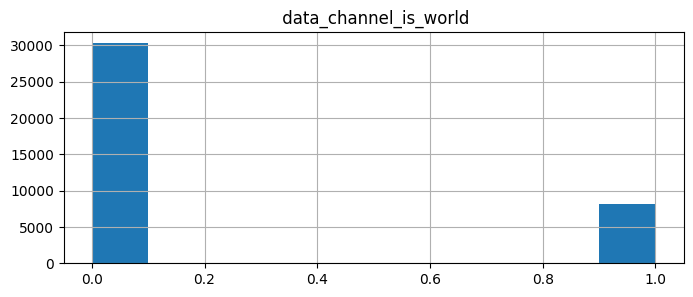

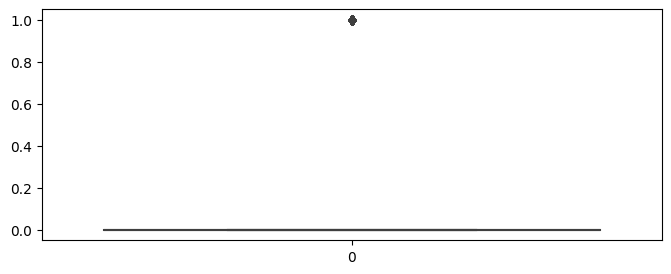

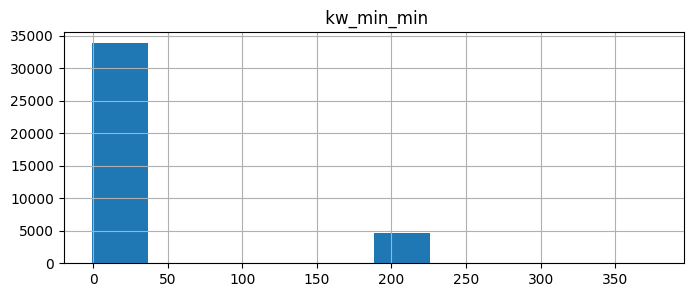

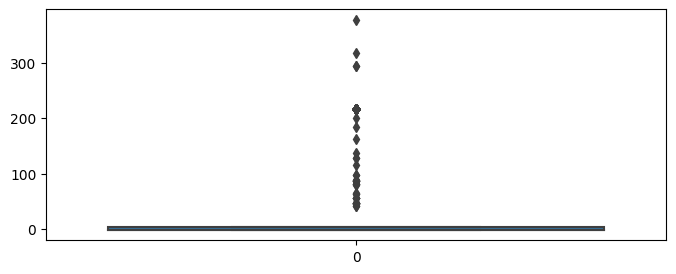

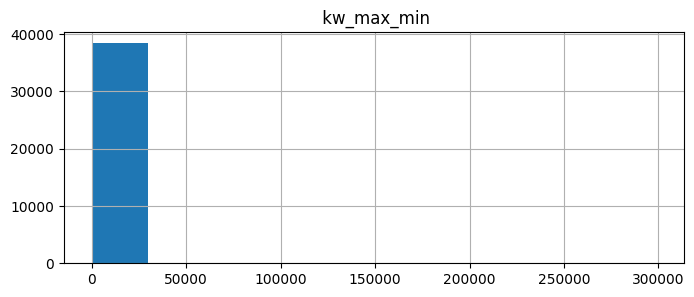

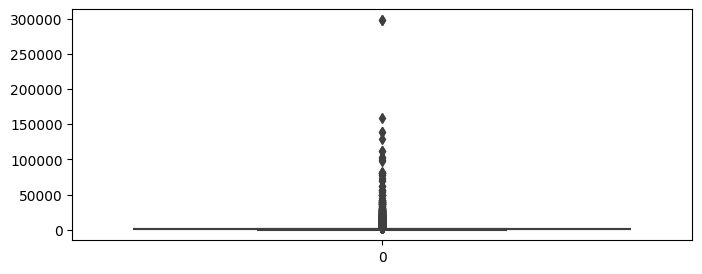

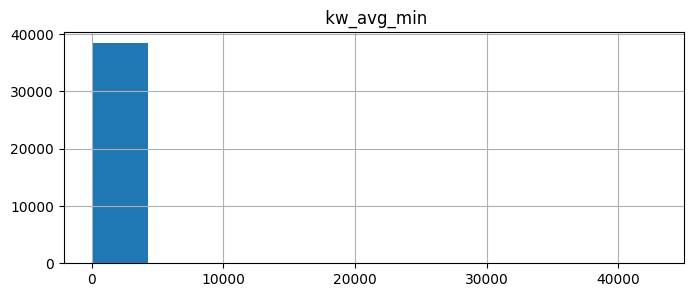

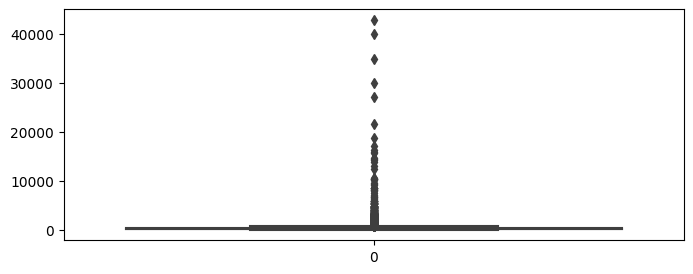

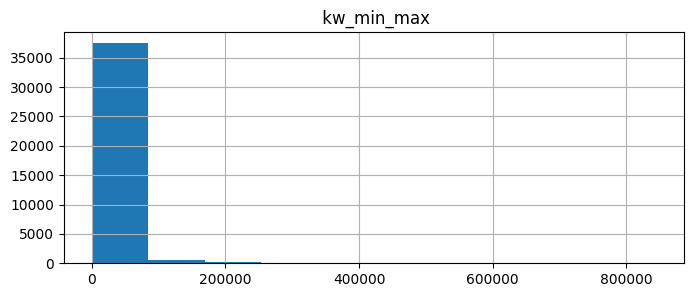

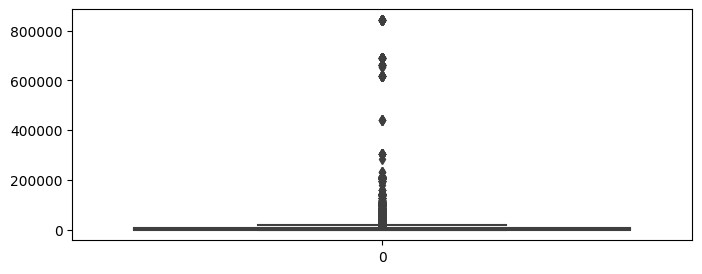

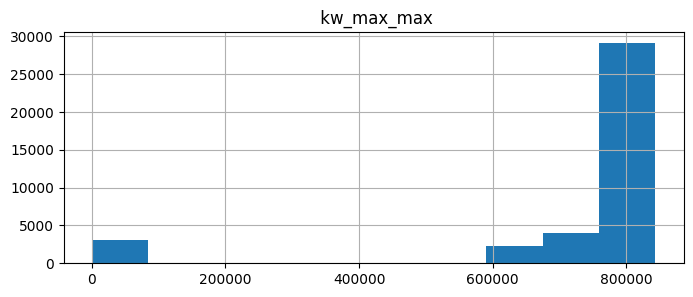

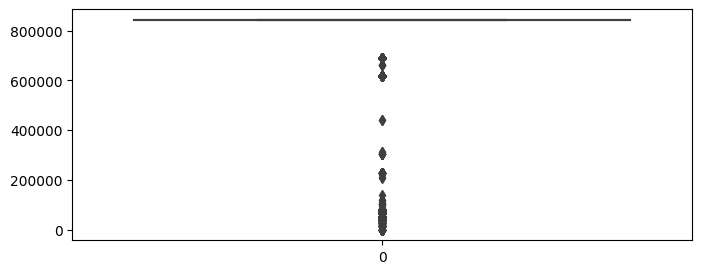

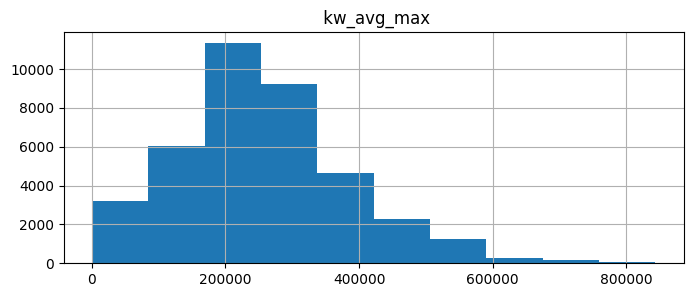

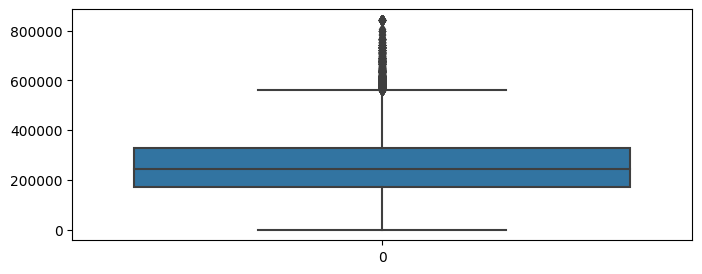

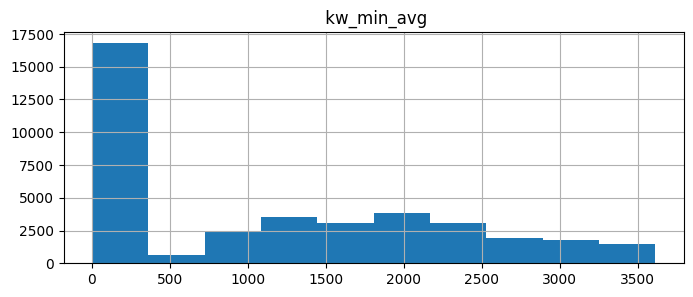

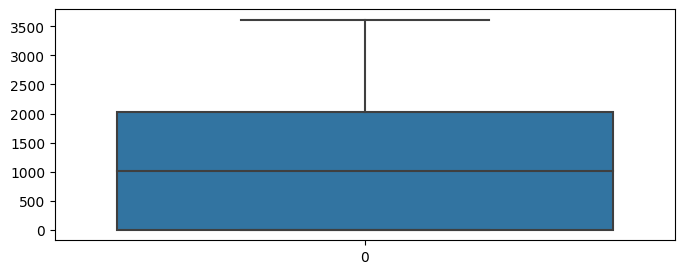

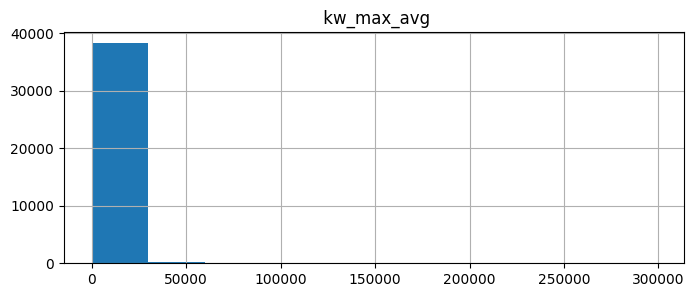

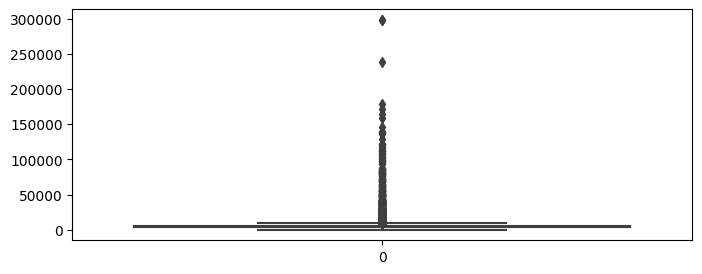

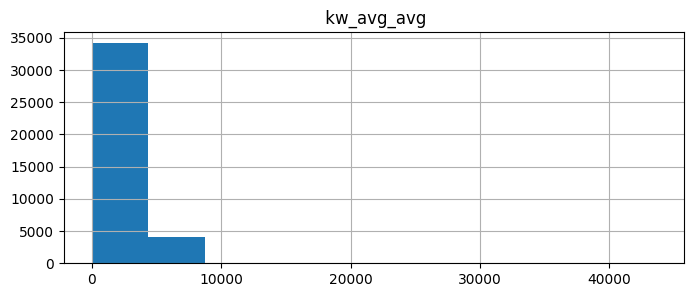

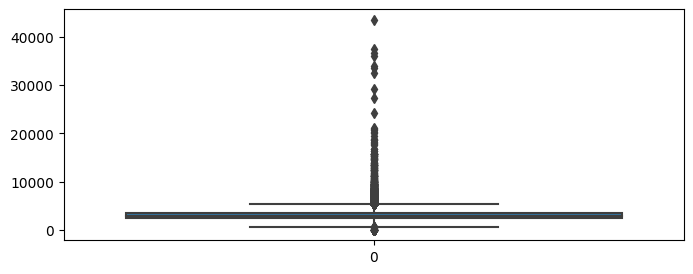

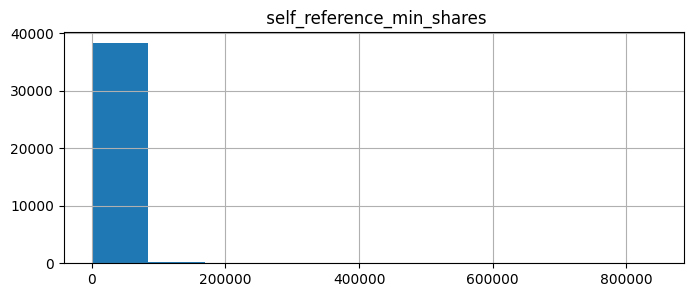

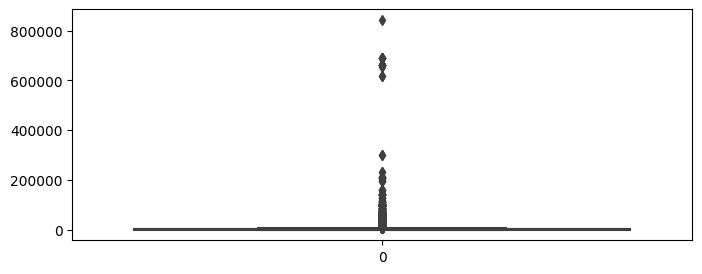

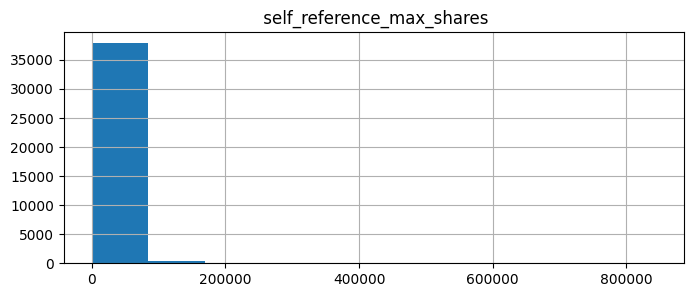

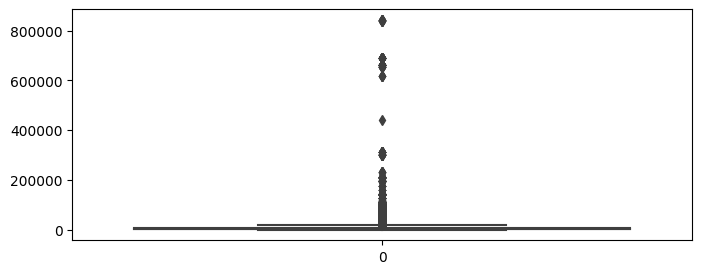

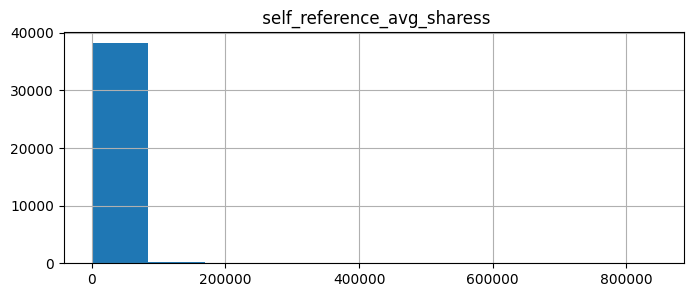

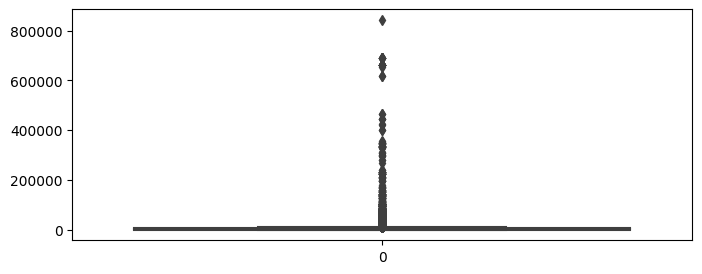

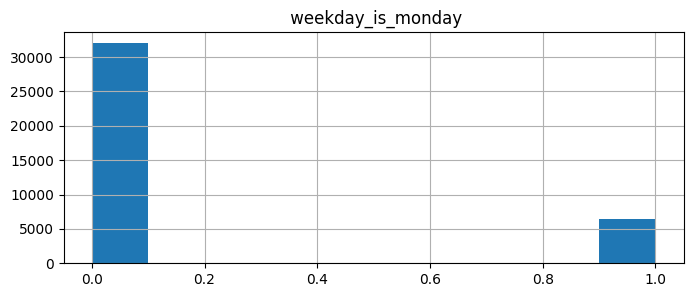

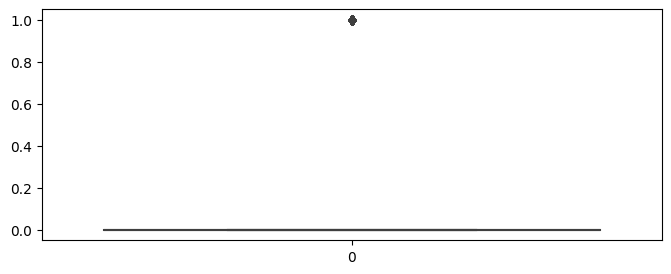

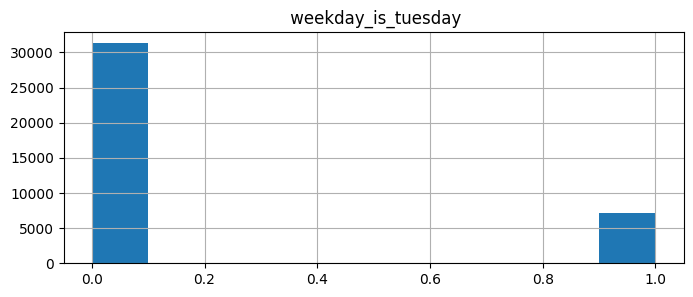

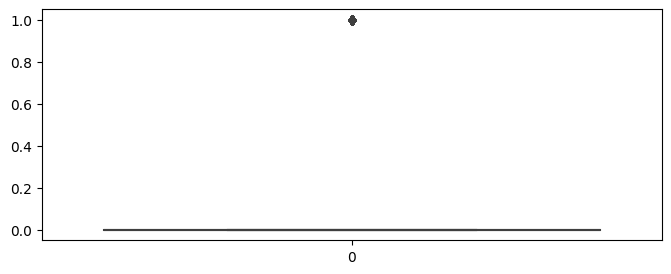

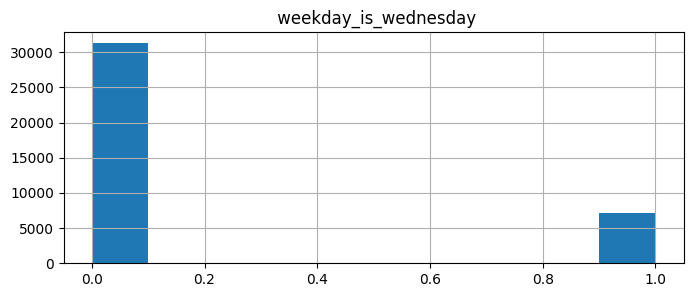

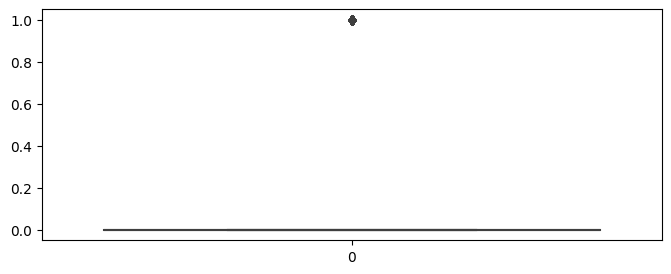

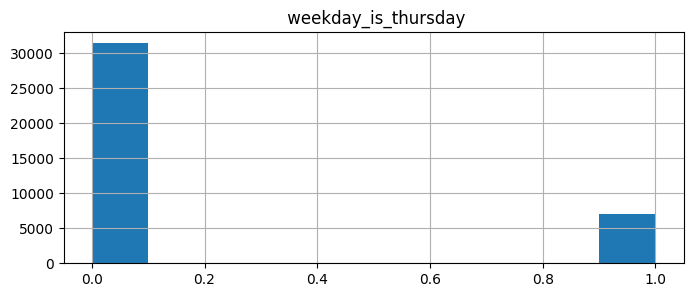

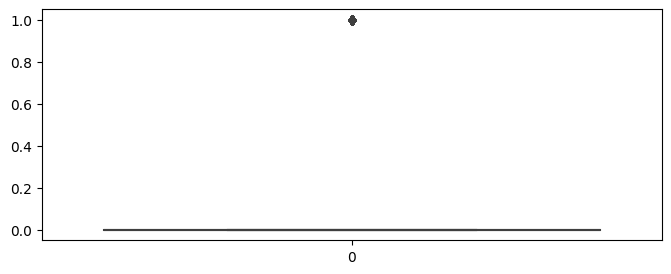

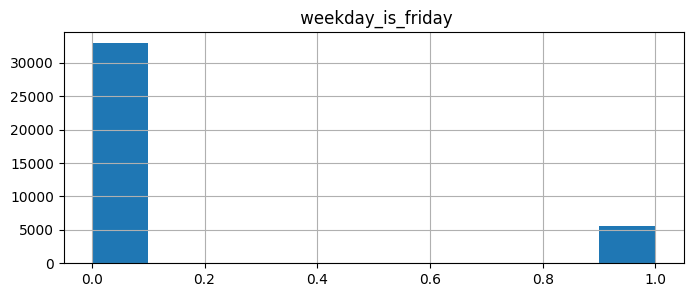

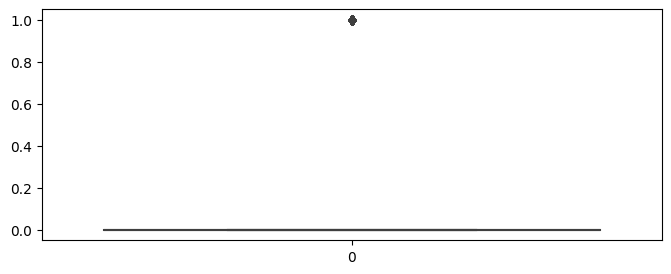

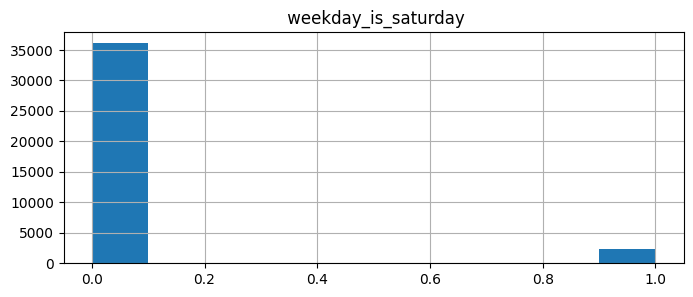

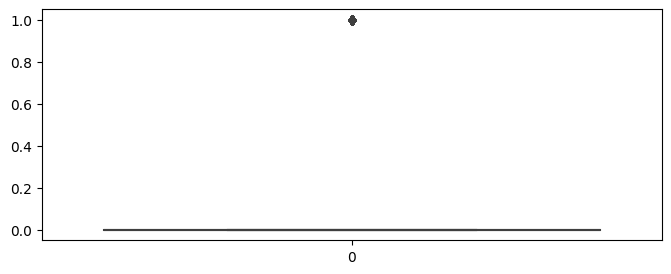

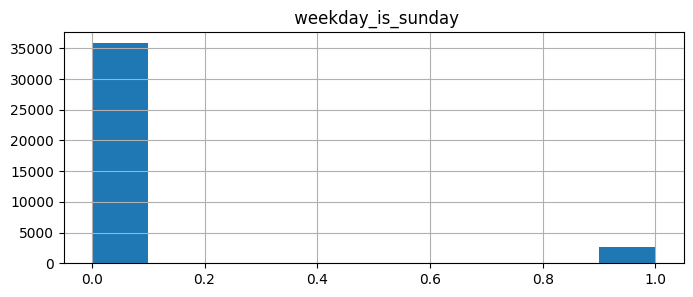

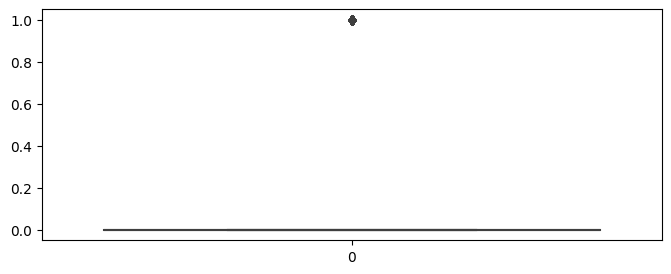

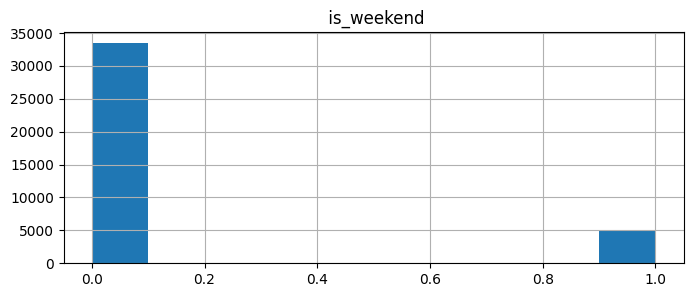

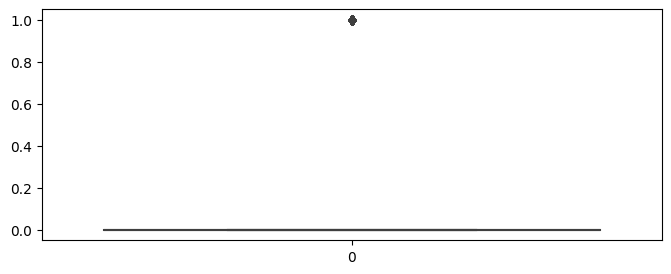

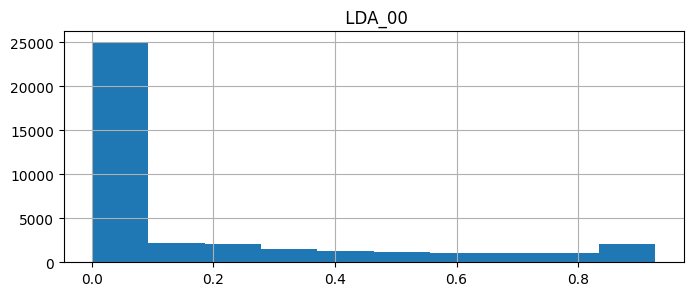

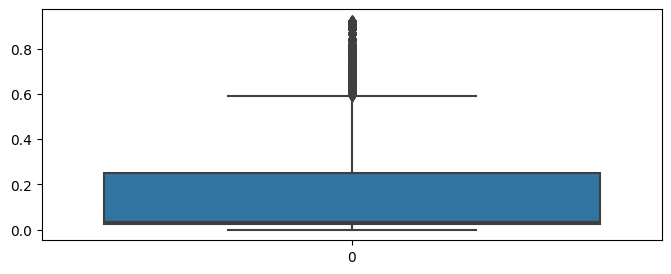

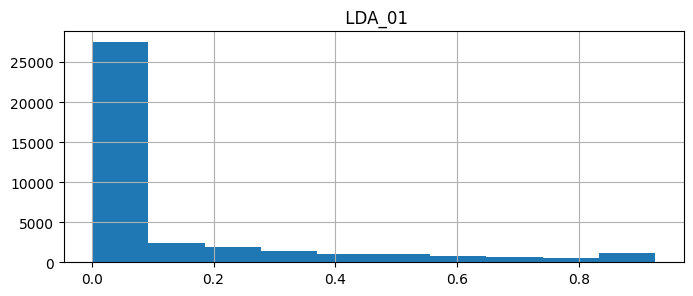

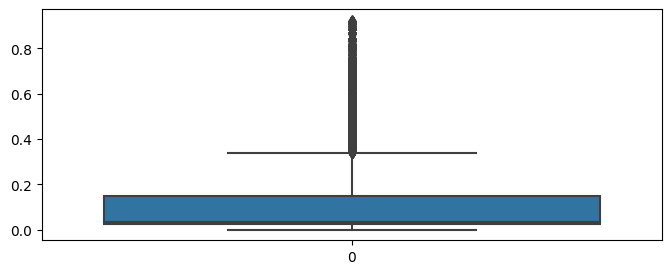

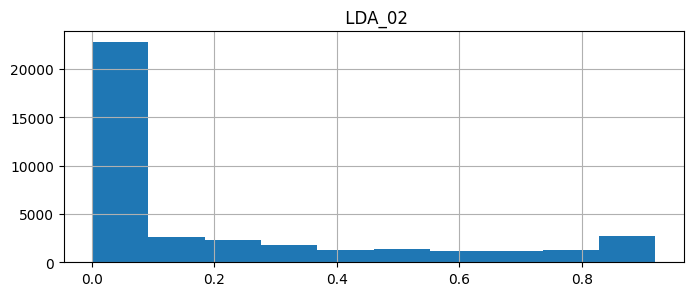

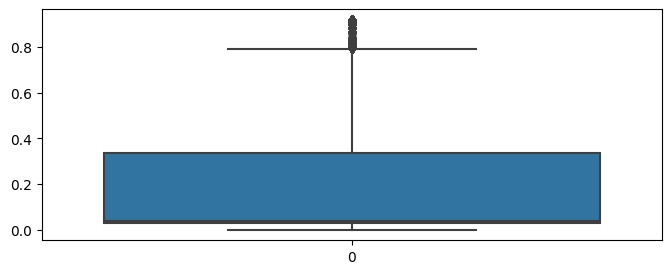

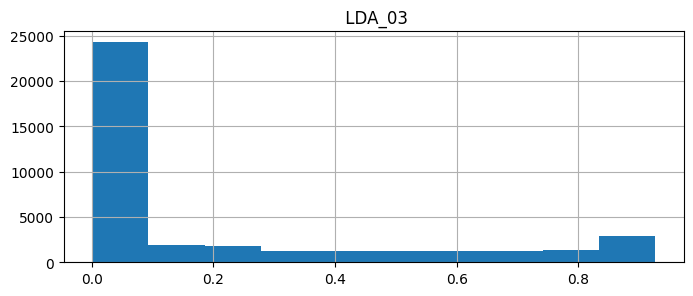

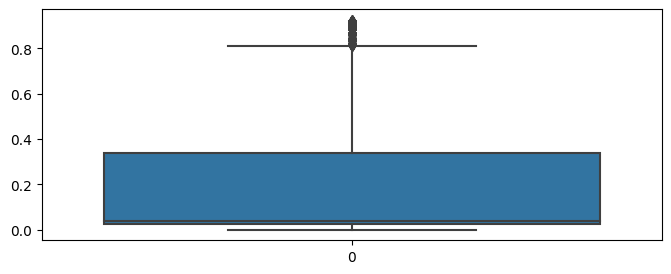

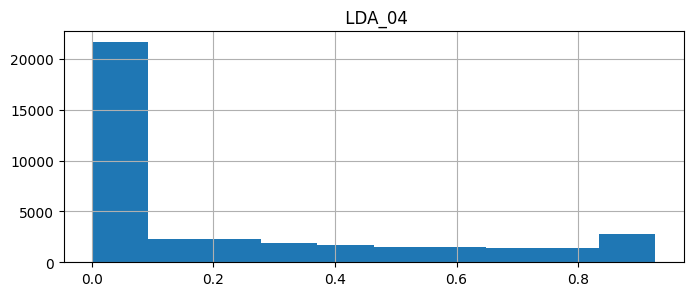

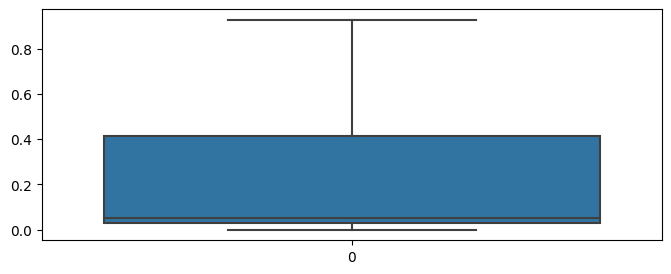

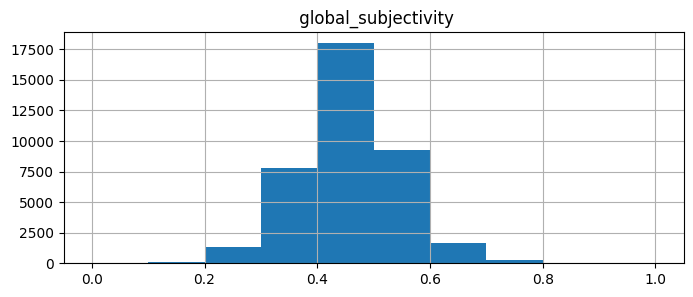

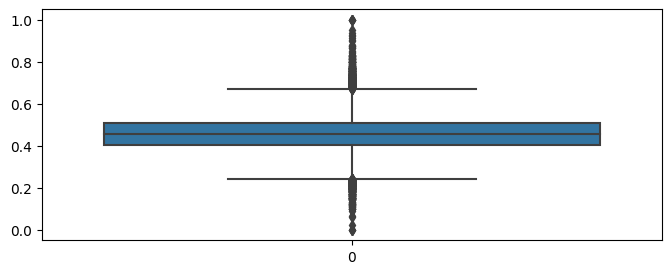

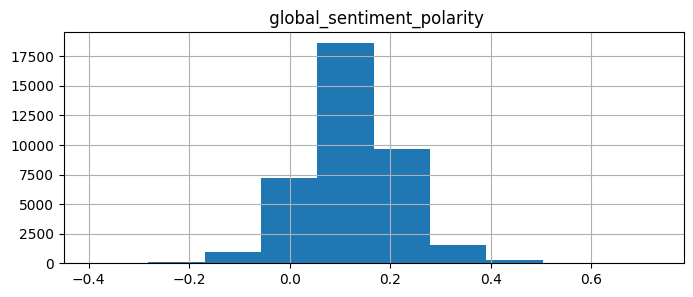

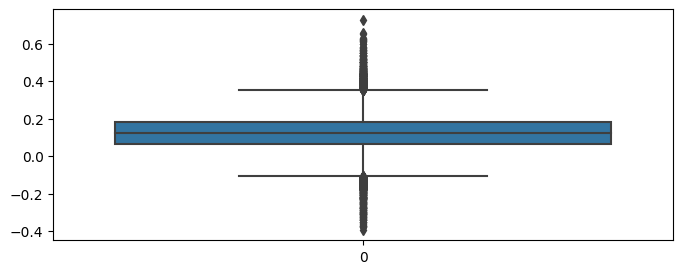

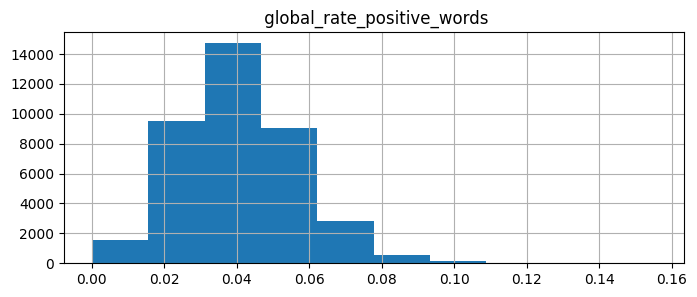

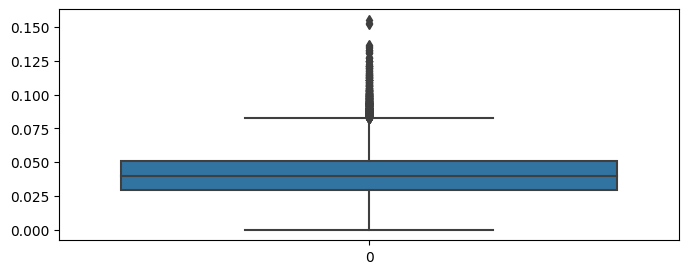

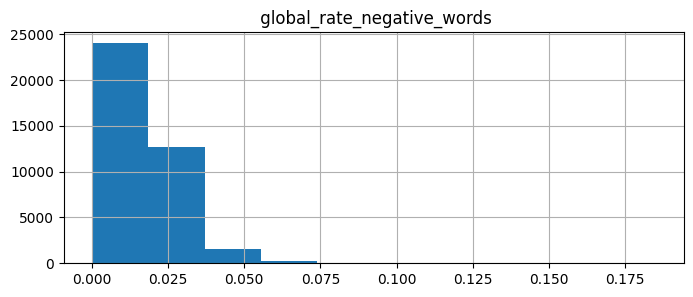

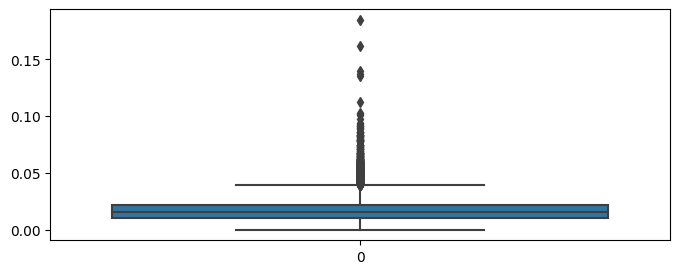

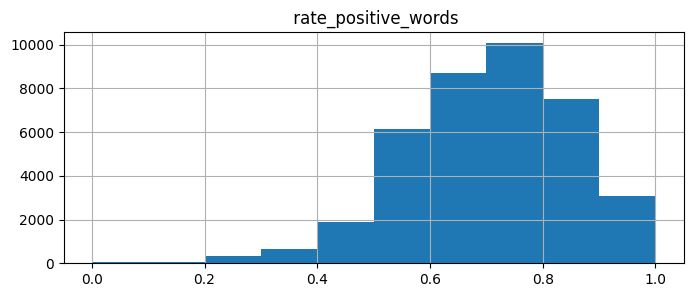

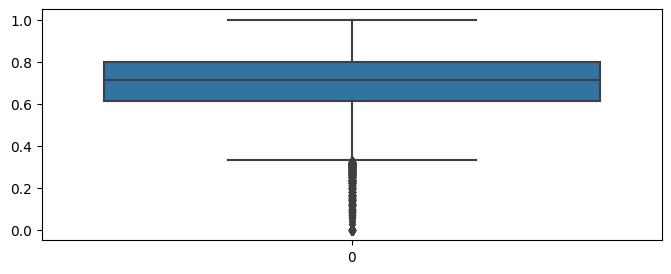

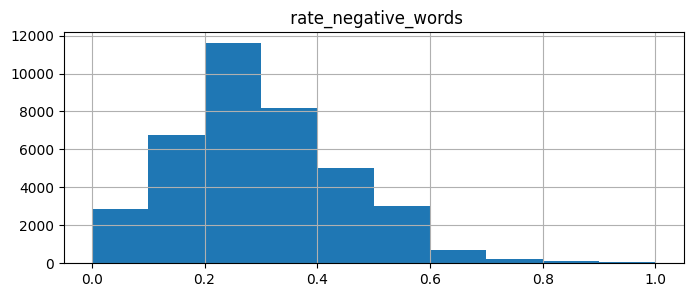

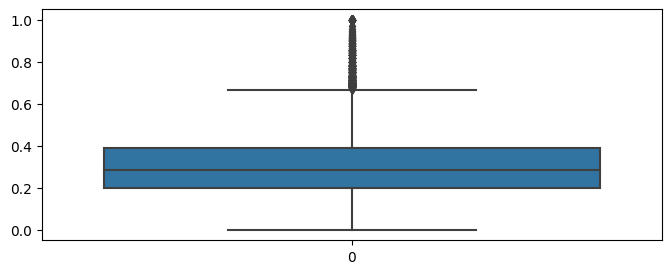

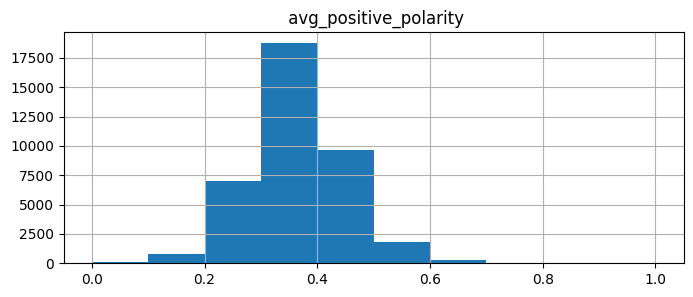

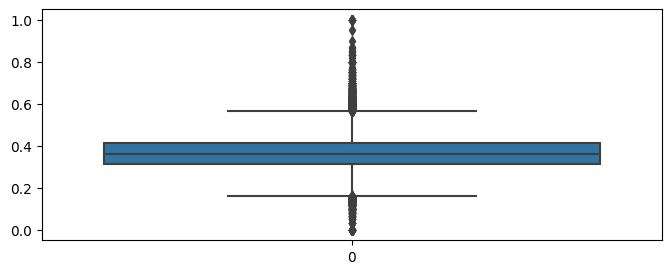

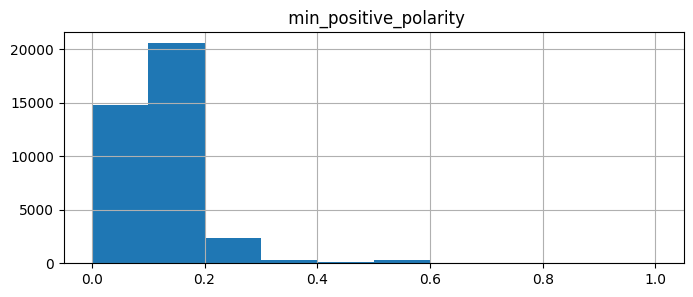

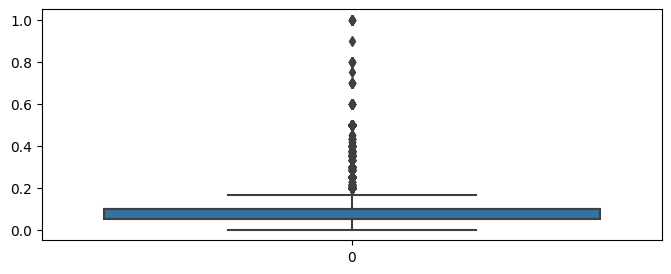

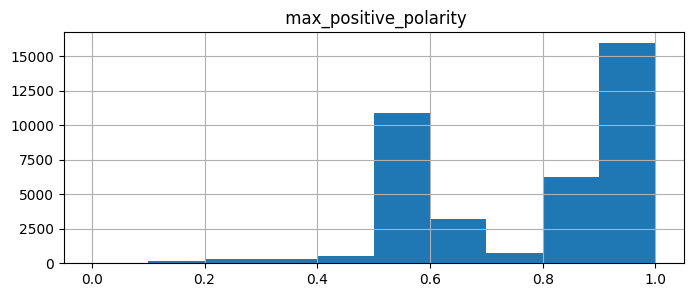

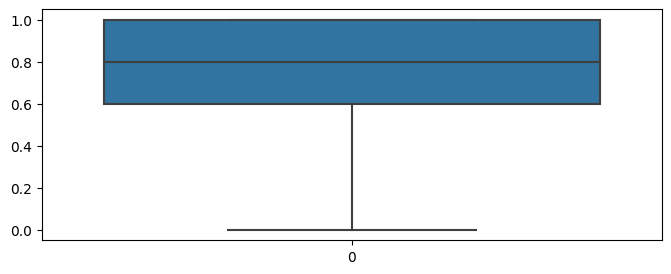

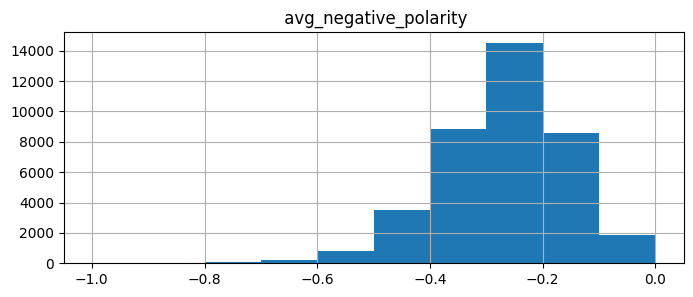

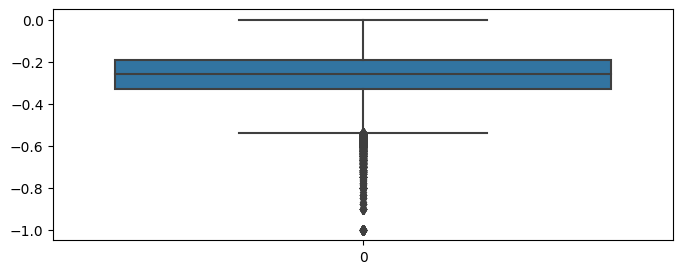

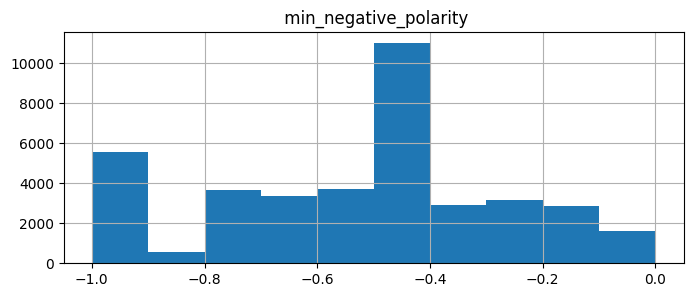

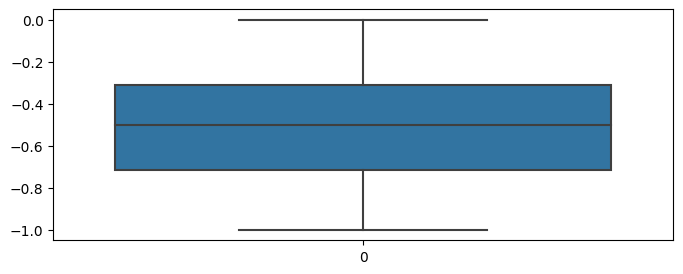

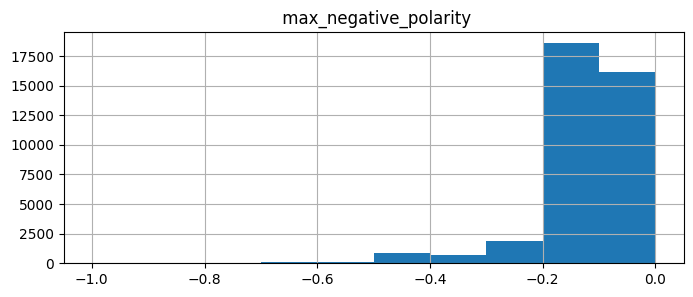

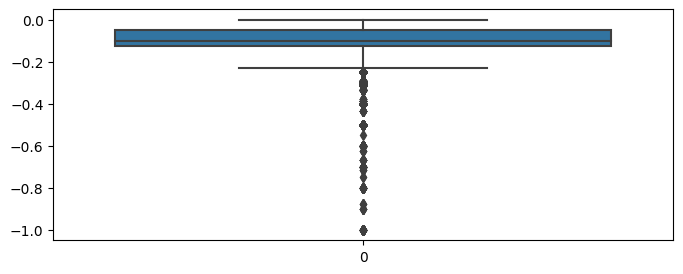

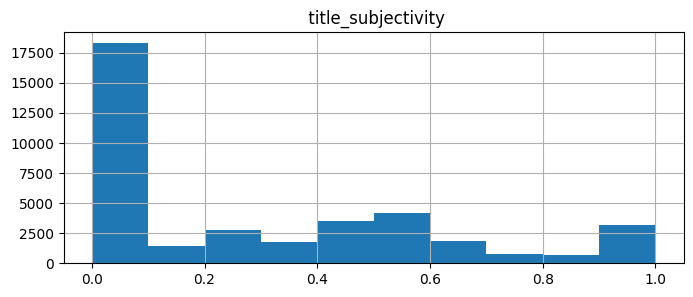

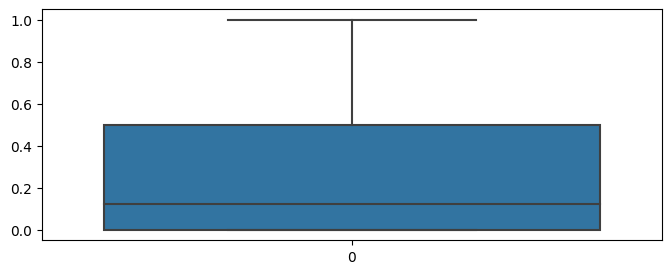

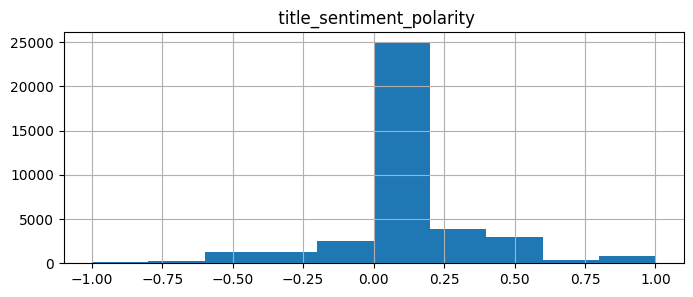

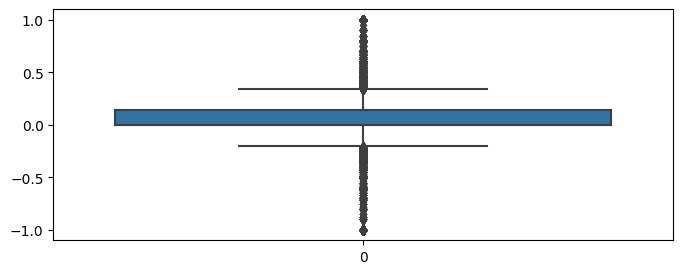

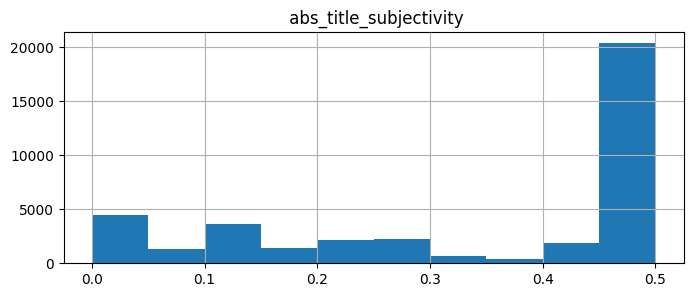

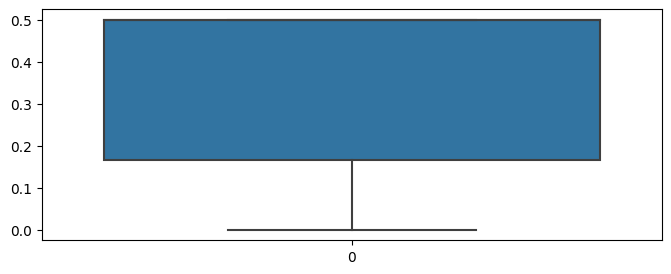

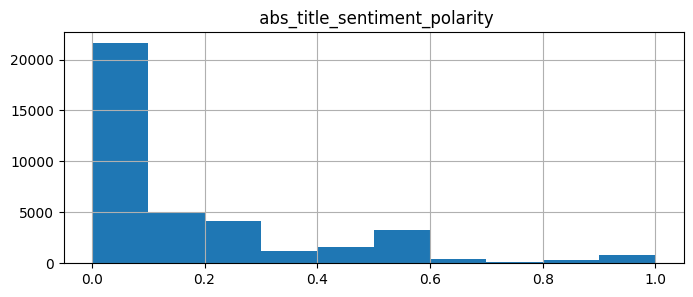

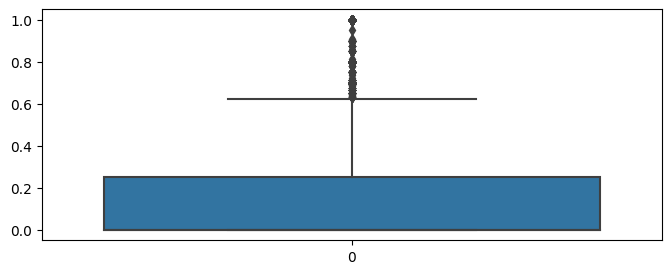

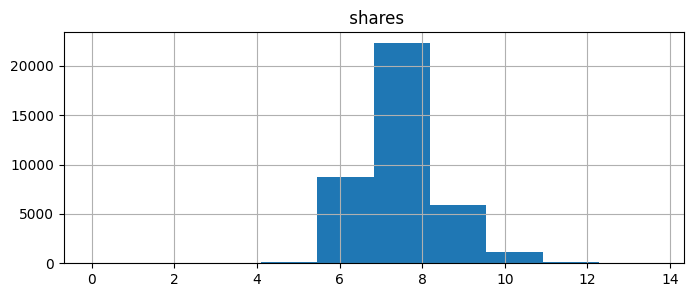

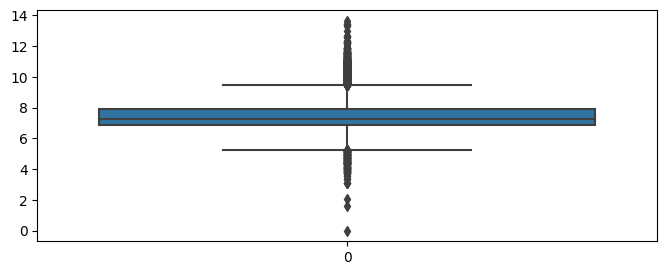

In [40]:
for i in range(altered_data.shape[1]):
    plot_hist_box(altered_data, altered_data.columns[i])

In [109]:
altered_data2 = altered_data.copy()

In [110]:
altered_data2[" log_n_tokens_content"] = [np.log(x) for x in altered_data2[' n_tokens_content']]

In [111]:
altered_data2 = altered_data2.drop(columns = [" n_tokens_content"])

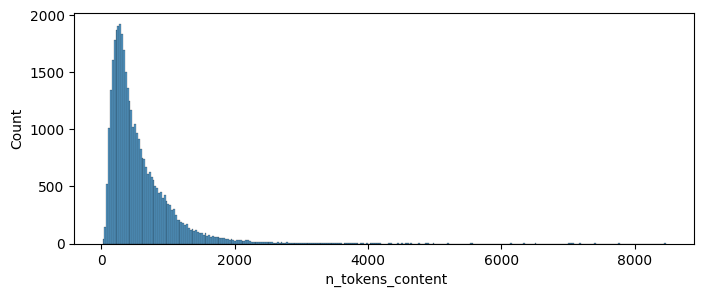

In [53]:
plot_hist(altered_data, " n_tokens_content")

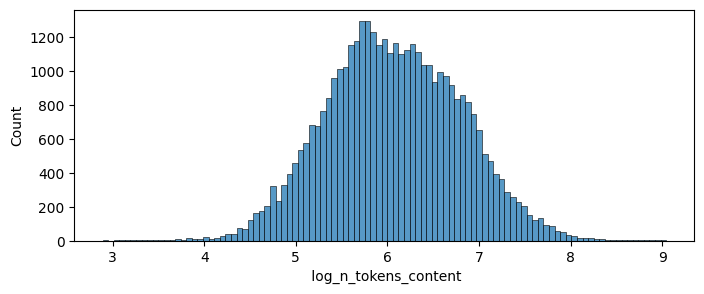

In [54]:
plot_hist(altered_data2, " log_n_tokens_content")

In [50]:
altered_data.corr()[" shares"][" n_tokens_content"]

0.03313332361317591

In [51]:
altered_data2.corr()[" log_n_tokens_content"][" shares"]

0.009318750401003302

In [52]:
scaled_data = robust_scaler(altered_data2)

Train score for linear regression = 13.0729%
Test score for linear regression = 12.146600000000001%
MSE:  0.682177021182709
MAE:  0.6135251192876564


Train score for polynomial regression = 1.3197%
Test score for polynomial regression = 1.5223%
MSE:  0.7646745971477587
MAE:  0.6627182079707605




In [112]:
altered_data = altered_data2.copy()

In [113]:
altered_data2[" log_num_hrefs"] = [np.sqrt(x) for x in altered_data2[' num_hrefs']]
altered_data2 = altered_data2.drop(columns = [" num_hrefs"])
altered_data2[" log_num_self_hrefs"] = [np.sqrt(x) for x in altered_data2[' num_self_hrefs']]
altered_data2 = altered_data2.drop(columns = [" num_self_hrefs"])
altered_data2[" log_num_imgs"] = [np.sqrt(x) for x in altered_data2[' num_imgs']]
altered_data2 = altered_data2.drop(columns = [" num_imgs"])
altered_data2[" log_num_videos"] = [np.sqrt(x) for x in altered_data2[' num_videos']]
altered_data2 = altered_data2.drop(columns = [" num_videos"])

In [114]:
print(altered_data2.corr()[" shares"][" log_num_hrefs"], altered_data2.corr()[" shares"][" log_num_self_hrefs"])
print(altered_data2.corr()[" shares"][" log_num_imgs"], altered_data2.corr()[" shares"][" log_num_videos"])

0.11765109319079205 0.05361993616903601
0.09942882703050765 0.05750889349436212


In [115]:
print(altered_data.corr()[" shares"][" num_hrefs"], altered_data.corr()[" shares"][" num_self_hrefs"])
print(altered_data.corr()[" shares"][" num_imgs"], altered_data.corr()[" shares"][" num_videos"])

0.11478601460761796 0.03536830357370299
0.09432783593507015 0.03339735625232001


In [116]:
scaled_data = robust_scaler(altered_data2)

Train score for linear regression = 13.1452%
Test score for linear regression = 12.1714%
MSE:  0.6819843076130606
MAE:  0.6134162535283904


Train score for polynomial regression = 1.0809%
Test score for polynomial regression = 1.1225%
MSE:  0.7677788682208716
MAE:  0.6639795247430491




In [117]:
altered_data = altered_data2.copy()

In [118]:
altered_data2['weekday'] = 0

In [119]:
for index, row in altered_data2.iterrows():
    if row[" weekday_is_monday"] == 1.0:
        altered_data2.at[index,'weekday'] = 1
    elif row[" weekday_is_tuesday"] == 1.0:
        altered_data2.at[index,'weekday'] = 2
    elif row[" weekday_is_wednesday"] == 1.0:
        altered_data2.at[index,'weekday'] = 3
    elif row[" weekday_is_thursday"] == 1.0:
        altered_data2.at[index,'weekday'] = 4
    elif row[" weekday_is_friday"] == 1.0:
        altered_data2.at[index,'weekday'] = 5
    elif row[" weekday_is_saturday"] == 1.0:
        altered_data2.at[index,'weekday'] = 6
    elif row[" weekday_is_sunday"] == 1.0:
        altered_data2.at[index,'weekday'] = 7

In [120]:
altered_data2 = altered_data2.drop(columns=[" weekday_is_monday"," weekday_is_tuesday"," weekday_is_wednesday"," weekday_is_thursday", " weekday_is_friday"," weekday_is_saturday"," weekday_is_sunday", " is_weekend"])

In [121]:
scaled_data = robust_scaler(altered_data2)

Train score for linear regression = 12.560099999999998%
Test score for linear regression = 11.7481%
MSE:  0.6852715391222608
MAE:  0.615114653004753


Train score for polynomial regression = 1.0807%
Test score for polynomial regression = 1.4284%
MSE:  0.7654033328662558
MAE:  0.663166419588756




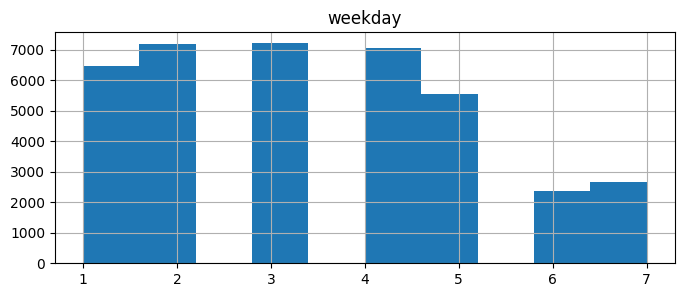

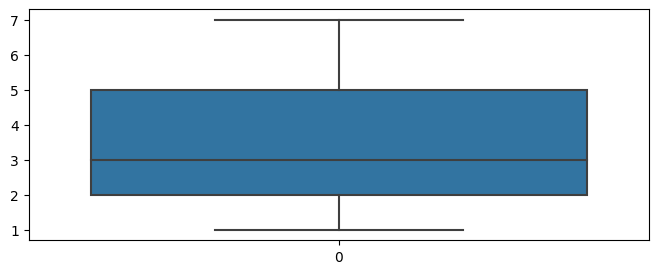

In [122]:
plot_hist_box(altered_data2, "weekday")

In [123]:
altered_data2 = altered_data.copy()

In [124]:
altered_data2[" log_LDA_00"] = [np.sqrt(x) for x in altered_data2[' LDA_00']]
altered_data2 = altered_data2.drop(columns = [" LDA_00"])
altered_data2[" log_LDA_01"] = [np.sqrt(x) for x in altered_data2[' LDA_01']]
altered_data2 = altered_data2.drop(columns = [" LDA_01"])
altered_data2[" log_LDA_02"] = [np.sqrt(x) for x in altered_data2[' LDA_02']]
altered_data2 = altered_data2.drop(columns = [" LDA_02"])
altered_data2[" log_LDA_03"] = [np.sqrt(x) for x in altered_data2[' LDA_03']]
altered_data2 = altered_data2.drop(columns = [" LDA_03"])
altered_data2[" log_LDA_04"] = [np.sqrt(x) for x in altered_data2[' LDA_04']]
altered_data2 = altered_data2.drop(columns = [" LDA_04"])

In [125]:
scaled_data = robust_scaler(altered_data2)

Train score for linear regression = 13.0596%
Test score for linear regression = 12.0603%
MSE:  0.6828475674883073
MAE:  0.6140019842796731


Train score for polynomial regression = 1.2537%
Test score for polynomial regression = 1.4612%
MSE:  0.765149021019884
MAE:  0.6629742087687869




In [126]:
altered_data2 = altered_data.copy()

In [127]:
altered_data2['data_channel_type'] = 0

In [128]:
for index, row in altered_data2.iterrows():
    if row[" data_channel_is_lifestyle"] == 1.0:
        altered_data2.at[index,'data_channel_type'] = 1
    elif row[" data_channel_is_entertainment"] == 1.0:
        altered_data2.at[index,'data_channel_type'] = 2
    elif row[" data_channel_is_bus"] == 1.0:
        altered_data2.at[index,'data_channel_type'] = 3
    elif row[" data_channel_is_socmed"] == 1.0:
        altered_data2.at[index,'data_channel_type'] = 4
    elif row[" data_channel_is_tech"] == 1.0:
        altered_data2.at[index,'data_channel_type'] = 5
    elif row[" data_channel_is_world"] == 1.0:
        altered_data2.at[index,'data_channel_type'] = 6

In [129]:
altered_data2 = altered_data2.drop(columns=[" data_channel_is_lifestyle"," data_channel_is_entertainment"," data_channel_is_bus"," data_channel_is_socmed", " data_channel_is_tech"," data_channel_is_world"])

In [130]:
scaled_data = robust_scaler(altered_data2)

Train score for linear regression = 12.3405%
Test score for linear regression = 11.3454%
MSE:  0.6883985124781791
MAE:  0.6181161539574107


Train score for polynomial regression = 1.1197000000000001%
Test score for polynomial regression = 1.4463%
MSE:  0.7652643394319811
MAE:  0.6628737821335577




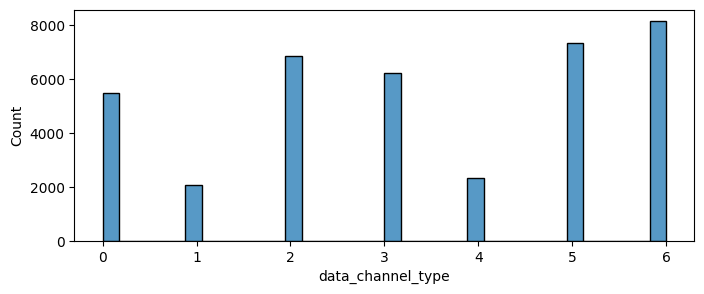

In [131]:
plot_hist(altered_data2, 'data_channel_type')

In [132]:
altered_data2 = altered_data.copy()

We see that some features are always zero, like n_non_stop_unique_tokens, n_non_stop_words, n_unique_tokens, so I am going to remove them

In [133]:
data.describe()[[" n_non_stop_unique_tokens", " n_non_stop_words", " n_unique_tokens"]]

,n_non_stop_unique_tokens,n_non_stop_words,n_unique_tokens
count,39644.000000,39644.000000,39644.000000
mean,0.689175,0.996469,0.548216
std,3.264816,5.231231,3.520708
min,0.000000,0.000000,0.000000
25%,0.625739,1.000000,0.470870
50%,0.690476,1.000000,0.539226
75%,0.754630,1.000000,0.608696
max,650.000000,1042.000000,701.000000


We find that the mean is less than 1

In [134]:
altered_data2 = altered_data2.drop(columns=[" n_non_stop_unique_tokens", " n_non_stop_words", " n_unique_tokens"])

In [135]:
scaled_data = robust_scaler(altered_data2)

Train score for linear regression = 13.098099999999999%
Test score for linear regression = 12.0863%
MSE:  0.6826453721334992
MAE:  0.6137232740837547


Train score for polynomial regression = 22.4393%
Test score for polynomial regression = 11.3803%
MSE:  0.688127410764058
MAE:  0.6136932746965602




In [136]:
altered_data = altered_data2.copy()

Now we see if we can improve our dataset by finding outliers and removing them. <br>We first check on the features with the highest correlations.

### kw_avg_avg

In [138]:
def get_IQR(data, feature):
    Q1 = np.percentile(data[feature], 25, method = 'midpoint')
    Q3 = np.percentile(data[feature], 75, method = 'midpoint')
    IQR = Q3 - Q1
    upper=Q3+1.5*IQR
    lower=Q1-1.5*IQR
    return upper, lower

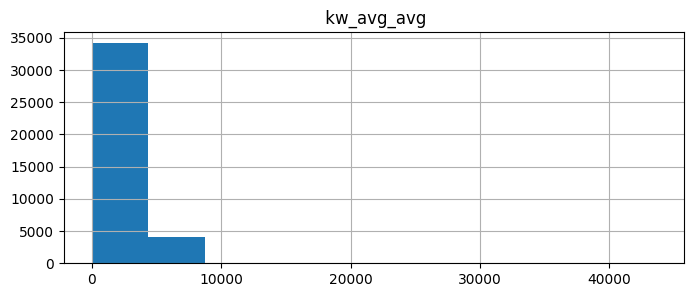

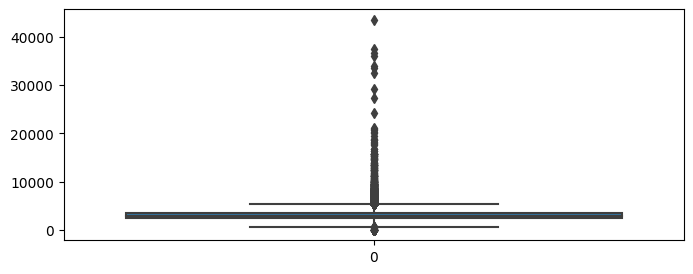

In [137]:
plot_hist_box(altered_data2, " kw_avg_avg")

In [139]:
upper_kw_avg, lower_kw_avg = get_IQR(altered_data2,' kw_avg_avg')
print("Upper Bound:", upper_kw_avg) 
print("Lower Bound:",lower_kw_avg)

Upper Bound: 5315.5849643525
Lower Bound: 608.7403532124995


In [140]:
#dropping outlier samples
altered_data2 = altered_data2[(altered_data2[' kw_avg_avg']<=upper_kw_avg) & (altered_data2[' kw_avg_avg']>=lower_kw_avg)]
print(f"{abs(altered_data.shape[0] - altered_data2.shape[0])} samples were dropped.")

1642 samples were dropped.


In [142]:
scaled_data = robust_scaler(altered_data2)

Train score for linear regression = 12.3431%
Test score for linear regression = 13.2247%
MSE:  0.6679253932389074
MAE:  0.5974620679253999


Train score for polynomial regression = 21.4788%
Test score for polynomial regression = 13.258700000000001%
MSE:  0.6676632977006868
MAE:  0.5957870050151667




In [143]:
altered_data = altered_data2.copy()

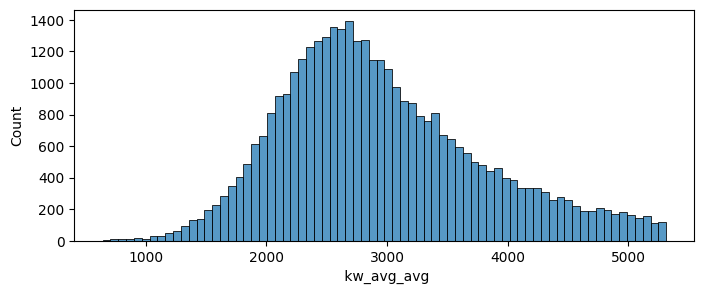

In [145]:
plot_hist(altered_data2, " kw_avg_avg")

### LDA_03 

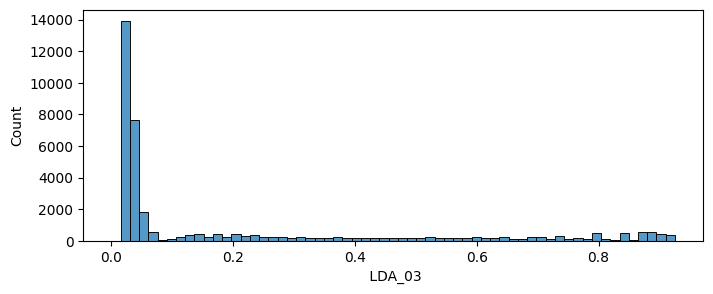

In [150]:
plot_hist(altered_data2," LDA_03")

In [151]:
upper, lower = get_IQR(altered_data2,' LDA_03')
print("Upper Bound:", upper) 
print("Lower Bound:",lower)

#dropping outlier samples
altered_data2 = altered_data2[(altered_data2[' LDA_03']<=upper) & (altered_data2[' LDA_03']>=lower)]
print(f"{abs(altered_data.shape[0] - altered_data2.shape[0])} samples were dropped.")

Upper Bound: 0.6571379024722499
Lower Bound: -0.35388516944575
4568 samples were dropped.


In [153]:
scaled_data = robust_scaler(altered_data2)

Train score for linear regression = 12.7654%
Test score for linear regression = 14.601500000000001%
MSE:  0.6142785349048615
MAE:  0.5855545139018415


Train score for polynomial regression = 22.856099999999998%
Test score for polynomial regression = 14.5375%
MSE:  0.6147391578748919
MAE:  0.5822723796815684




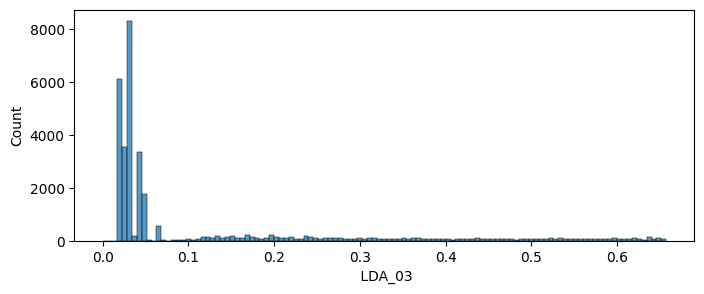

In [154]:
plot_hist(altered_data2," LDA_03")

In [173]:
altered_data = altered_data2.copy()

In [196]:
abs(altered_data.corr()[" shares"]).sort_values(ascending=False)

 shares                           1.000000
 kw_avg_avg                       0.238334
 LDA_02                           0.163764
 data_channel_is_world            0.155744
 kw_max_avg                       0.153699
 is_weekend                       0.125237
 global_subjectivity              0.110064
 data_channel_is_socmed           0.106413
 log_num_hrefs                    0.099680
 data_channel_is_tech             0.096099
 LDA_04                           0.094816
 kw_min_avg                       0.088061
 weekday_is_saturday              0.087791
 global_rate_positive_words       0.085437
 LDA_03                           0.084341
 weekday_is_sunday                0.083326
 self_reference_avg_sharess       0.080592
 average_token_length             0.077575
 global_sentiment_polarity        0.075756
 self_reference_max_shares        0.071680
 log_num_imgs                     0.071543
 data_channel_is_entertainment    0.068525
 self_reference_min_shares        0.067146
 rate_negat

In [234]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectFromModel

In [235]:
X_train,X_test,y_train,y_test = train_test_split(altered_data.drop(columns=[" shares"]),altered_data[" shares"],test_size=0.3)

In [236]:
y_train.shape

(22577,)

In [237]:
X_train.shape

(22577, 55)

In [238]:
sel = SelectFromModel(RandomForestRegressor(n_estimators = 100))
sel.fit(X_train, y_train)

SelectFromModel(estimator=RandomForestRegressor())

In [251]:
selected_feat= X_train.columns[(sel.get_support())]
print(selected_feat)

Index([' n_tokens_title', ' average_token_length', ' kw_max_min',
       ' kw_avg_min', ' kw_avg_max', ' kw_min_avg', ' kw_max_avg',
       ' kw_avg_avg', ' self_reference_min_shares',
       ' self_reference_avg_sharess', ' LDA_00', ' LDA_01', ' LDA_02',
       ' LDA_03', ' LDA_04', ' global_subjectivity',
       ' global_sentiment_polarity', ' global_rate_positive_words',
       ' global_rate_negative_words', ' avg_positive_polarity',
       ' avg_negative_polarity', ' log_n_tokens_content', ' log_num_hrefs'],
      dtype='object')


In [254]:
scaled_data = robust_scaler(altered_data[selected_feat.insert(0," shares")])

Train score for linear regression = 9.8549%
Test score for linear regression = 12.0955%
MSE:  0.6323041661031887
MAE:  0.5974173442724675


Train score for polynomial regression = 14.197000000000001%
Test score for polynomial regression = 13.331399999999999%
MSE:  0.623414187944714
MAE:  0.5875740495977906


